## Лекция 2. Распределения, их виды, примеры
$\mathcal{D}\xi = E\xi ^2 - (E\xi)^2$

$\mathcal{D}\xi = E(\xi - E\xi)^2$

### Распределение Бернулли
- Обозначение: $Bern(p)$
- Параметры: $p \in (0, 1)$
- Носитель: {0, 1}, __дискретное__
- Вероятность: $P({1}) = p$
- Математическое ожидание: p
- Дисперсия: $p(1 - p)$

Интерпретация: p - вероятность выпадения орла у монетки

![bernulli](/Users/dadaya/Desktop/progs/bernulli.png)

### Биномиальное распределение
- Обозначение: $Bin(n, p)$
- Параметры: $n \in \mathcal{N}, p \in (0, 1)$
- Носитель: {0, 1,..., n}, __дискретное__
- Вероятность: $P({k}) = C^k_np^k(1 - p)^{n - k}$
- Математическое ожидание: $np$
- Дисперсия: $np(1 - p)$

Интерпретация: p - вероятность выпадения орла у монетки, n - кол-во подбрасываний монетки

![binom](/Users/dadaya/Desktop/progs/binom.png)

### Равномерное распределение
- Обозначение: $U(x)$, x - конечное
- Параметры: $a,b \in \mathcal{R}, n = b - a + 1$
- Носитель: $k \in (a, b)$, __дискретное__
- Вероятность: $P(x) = \frac{1}{|x|}$
- Математическое ожидание: $\frac{a + b}{2}$
- Дисперсия: $\frac{n^2 - 1}{12}$

Интерпретация: более общий случай биномиального распределения на большее число вероятных исходов

![uniform_discr](/Users/dadaya/Desktop/progs/uniform_discr.png)

### Распределение Пуассона
- Обозначение: $Pois(\lambda)$
- Параметры: $\lambda > 0$
- Носитель: $k \in \mathcal{Z}_+U\{0\}$, __дискретное__
- Вероятность: $P(k) = \frac{\lambda ^ke^{-\lambda}}{k!}$
- Математическое ожидание: $\lambda$
- Дисперсия: $\lambda$

Интерпретация: представляет собой число событий, произошедших за фиксированное время, при условии, что данные события происходят с некоторой фиксированной средней интенсивностью независимо друг от друга

![poisson](/Users/dadaya/Desktop/progs/poisson.png)

### Абсолютно непрерывное равномерное распределение
- Обозначение: $U([a;b])$, x - конечное
- Параметры: $a,b \in \mathcal{R}, n = b - a + 1$
- Носитель: $k \in (a, b)$, __абсолютно непрерывное__
- Вероятность: $P(x) = \frac{1}{b - a}I(x \in [a;b])$
- Математическое ожидание: $\frac{a + b}{2}$
- Дисперсия: $\frac{n^2 - 1}{12}$

Интерпретация: 

![uniform](/Users/dadaya/Desktop/progs/uniform.png)

### Гауссовское(Нормальное) распределение
- Обозначение: $Norm(\mu, \sigma ^2)$
- Параметры: $a,b \in \mathcal{R}, n = b - a + 1$
- Носитель: $x \in \mathcal{R}$, __абсолютно непрерывное__
- Вероятность: $P(x) = \frac{1}{\sqrt{2\pi \sigma ^2}}e^{-\frac{(x - \mu)^2}{2\sigma ^2}}$
- Математическое ожидание: $\mu$
- Дисперсия: $\sigma ^2$

Стандартное нормальное распределение: $Norm(0;1): P = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$

Интерпретация: 

![norm](/Users/dadaya/Desktop/progs/norm.png)

### Экспоненциальное распределение
- Обозначение: $Exp(\lambda)$
- Параметры: $\lambda > 0$
- Носитель: $x \in \mathcal{R}$, __абсолютно непрерывное__
- Вероятность: $P(x) = \lambda e^{-\lambda x}I(x \geq 0)$
- Математическое ожидание: $\frac{1}{\lambda}$
- Дисперсия: $\frac{1}{\lambda ^{2}}$

Интерпретация: 

![expon](/Users/dadaya/Desktop/progs/expon.png)

А теперь к семинару!

## Семинар. Pandas. Data Analysis. Пример анализа данных на датасете титаника

Pandas &mdash; пакет для статистической обработки данных, по функциональности близкий к SQL и R. Включает в себя функциональность работы с базами данных и таблицами Excel.

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import warnings
warnings.simplefilter("ignore", FutureWarning)
import seaborn as sns
sns.set_palette("Set2")

%matplotlib inline

### 1. Тип данных `Series`

Одномерный набор данных. Отсутствующий данные записываются как `np.nan`. Например, в этот день термометр сломался или метеоролог был пьян. При вычислении среднего и других операций соответствующие функции не учитывают отсутствующие значения.

In [ ]:
l = [1, 3, 5, np.nan, 6, 8]
s = pd.Series(l)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

**Полезно знать:** Для поиска пропусков есть специальный метод `.isna()`. Он эквивалентен конструкции `s != s`

In [ ]:
s.isna()

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

Основная информация о наборе данных: количество записей, среднее, стандартное отклонение, минимум, нижний квартиль, медиана, верхний квартиль, максимум, а так же тип данных.

In [ ]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

В данном примере обычная индексация.

In [ ]:
s[2]

5.0

In [ ]:
s[2] = 7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [ ]:
s1 = s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
s2 = s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64

В сумме `s1+s2` складываются данные **с одинаковыми индексами**. Поскольку в `s1` нет данного и индексом 0, а в `s2` &mdash; с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [ ]:
s1 + s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64

К наборам данных можно применять функции из `numpy`.

In [ ]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

При создании набора данных `s` мы не указали, что будет играть роль индекса. По умолчанию это последовательность неотрицательных целых чисел 0, 1, 2, ...

In [ ]:
s.index

RangeIndex(start=0, stop=6, step=1)

Но можно создавать наборы данных с индексом, заданным списком.

In [ ]:
i = list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [ ]:
s = pd.Series(l, index=i)
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [ ]:
s['c']

5.0

Если индекс &mdash; строка, то вместо `s['c']` можно писать `s.c`.

In [ ]:
s.cc

5.0

Набор данных можно создать из словаря.

In [ ]:
s = pd.Series({'a':1, 'b':2, 'c':0})
s

a    1
b    2
c    0
dtype: int64

Можно отсортировать набор данных.

In [ ]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат или времён измерения и т.д..

In [ ]:
d = pd.date_range('20160101', periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
s = pd.Series(sps.norm.rvs(size=10), index=d)
s

2016-01-01   -1.100690
2016-01-02   -0.607138
2016-01-03    1.268569
2016-01-04    1.023828
2016-01-05   -1.283569
2016-01-06    0.878799
2016-01-07    0.994709
2016-01-08   -0.841616
2016-01-09   -1.059865
2016-01-10    1.209186
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [ ]:
s > 0

2016-01-01    False
2016-01-02    False
2016-01-03     True
2016-01-04     True
2016-01-05    False
2016-01-06     True
2016-01-07     True
2016-01-08    False
2016-01-09    False
2016-01-10     True
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть `True`.

In [ ]:
s[s > 0]

2016-01-03    1.268569
2016-01-04    1.023828
2016-01-06    0.878799
2016-01-07    0.994709
2016-01-10    1.209186
dtype: float64

Кумулятивные максимумы &mdash; от первого элемента до текущего. Первое значение кумулятивного максимума совпадает с первым значением исходного массива. Далее значение $k$-го элемента есть максимум среди элементов до $k$-го включительно.

In [ ]:
s.cummax()

2016-01-01   -1.100690
2016-01-02   -0.607138
2016-01-03    1.268569
2016-01-04    1.268569
2016-01-05    1.268569
2016-01-06    1.268569
2016-01-07    1.268569
2016-01-08    1.268569
2016-01-09    1.268569
2016-01-10    1.268569
Freq: D, dtype: float64

Кумулятивные суммы. Первое значение кумулятивной суммы совпадает с первым значением исходного массива. Далее значение $k$-го элемента есть сумма элементов до $k$-го включительно.

In [ ]:
s.cumsum()

2016-01-01   -1.100690
2016-01-02   -1.707829
2016-01-03   -0.439260
2016-01-04    0.584568
2016-01-05   -0.699001
2016-01-06    0.179798
2016-01-07    1.174507
2016-01-08    0.332890
2016-01-09   -0.726975
2016-01-10    0.482211
Freq: D, dtype: float64

Произвольные функции кумулятивным способом можно считать с помощью конструкции `expanding`. Например, так можно посчитать кумулятивные медианы. Будет не быстрее, чем вручную, но аккуратнее.

In [ ]:
s.expanding().apply(np.median, raw=True)

2016-01-01   -1.100690
2016-01-02   -0.853914
2016-01-03   -0.607138
2016-01-04    0.208345
2016-01-05   -0.607138
2016-01-06    0.135830
2016-01-07    0.878799
2016-01-08    0.135830
2016-01-09   -0.607138
2016-01-10    0.135830
Freq: D, dtype: float64

Если вы хотите посчитать разности соседних элементов, воспользуйтесь методом `diff`.  Ключевое слово `periods` отвечает за то, с каким шагом будут считаться разности.

In [ ]:
s.diff()

2016-01-01         NaN
2016-01-02    0.493552
2016-01-03    1.875707
2016-01-04   -0.244741
2016-01-05   -2.307397
2016-01-06    2.162367
2016-01-07    0.115911
2016-01-08   -1.836326
2016-01-09   -0.218249
2016-01-10    2.269051
Freq: D, dtype: float64

Результат будет иметь тот же размер, но в начале появятся пропущенные значения.  От них можно избавиться при помощи метода `dropna`.

In [ ]:
s.diff().dropna()

2016-01-02    0.493552
2016-01-03    1.875707
2016-01-04   -0.244741
2016-01-05   -2.307397
2016-01-06    2.162367
2016-01-07    0.115911
2016-01-08   -1.836326
2016-01-09   -0.218249
2016-01-10    2.269051
Freq: D, dtype: float64

**Упражнение**  
Посчитайте кумулятивное среднее квадратов разностей соседних элементов набора `s`.

In [ ]:
# ВАШ КОД
s.diff().dropna().expanding().apply(lambda x: np.mean(x**2))

2016-01-02    0.243593
2016-01-03    1.880935
2016-01-04    1.273923
2016-01-05    2.286462
2016-01-06    2.764336
2016-01-07    2.305853
2016-01-08    2.458173
2016-01-09    2.156855
2016-01-10    2.489270
Freq: D, dtype: float64

Наконец, построим график.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Нужно для новых версий библиотек для преобразования дат
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

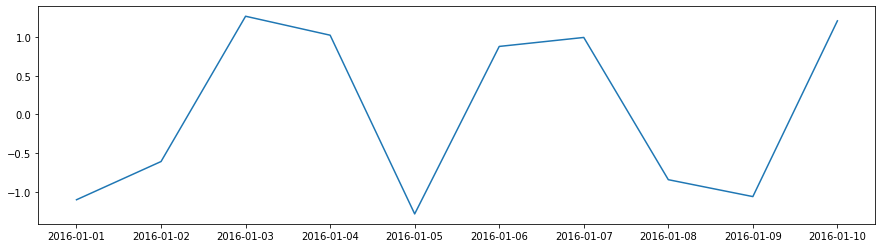

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(s)
plt.show()

### 2. Тип данных `DataFrame`

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [ ]:
d = {'one': pd.Series(range(6), index=list('abcdef')),
     'two': pd.Series(range(7), index=list('abcdefg')),
     'three': pd.Series(sps.norm.rvs(size=7), index=list('abcdefg'))}
df = pd.DataFrame(d)
df

,one,two,three
a,0.0,0,-0.542906
b,1.0,1,-0.406389
c,2.0,2,-0.372887
d,3.0,3,-0.047911
e,4.0,4,0.525983
f,5.0,5,0.316435
g,NaN,6,-0.253895


Таблица с несколькими разными типами данных

In [ ]:
df2 = pd.DataFrame({ 'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)),
                                    dtype='float32'),
                     'D': np.array([3] * 4, 
                                   dtype='int32'),
                     'E': pd.Categorical(["test", "train",
                                          "test", "train"]),
                     'F': 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#### 2.1 Данные

Вернемся к первой таблице и посмотрим на ее начало и конец

In [ ]:
df.head()

,one,two,three
a,0.0,0,-0.542906
b,1.0,1,-0.406389
c,2.0,2,-0.372887
d,3.0,3,-0.047911
e,4.0,4,0.525983


In [ ]:
df.tail(3)

,one,two,three
e,4.0,4,0.525983
f,5.0,5,0.316435
g,NaN,6,-0.253895


Индексы

In [ ]:
df.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

Названия колонок

In [ ]:
df.columns

Index(['one', 'two', 'three'], dtype='object')

Получение обычной матрицы данных

In [ ]:
df.values

array([[ 0.        ,  0.        , -0.54290577],
       [ 1.        ,  1.        , -0.40638852],
       [ 2.        ,  2.        , -0.3728874 ],
       [ 3.        ,  3.        , -0.04791126],
       [ 4.        ,  4.        ,  0.52598272],
       [ 5.        ,  5.        ,  0.31643534],
       [        nan,  6.        , -0.2538949 ]])

Описательные статистики

In [ ]:
df.describe()

,one,two,three
count,6.000000,7.000000,7.000000
mean,2.500000,3.000000,-0.111653
std,1.870829,2.160247,0.399004
min,0.000000,0.000000,-0.542906
25%,1.250000,1.500000,-0.389638
50%,2.500000,3.000000,-0.253895
75%,3.750000,4.500000,0.134262
max,5.000000,6.000000,0.525983


Транспонирование данных

In [ ]:
df.T

,a,b,c,d,e,f,g
one,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,NaN
two,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
three,-0.542906,-0.406389,-0.372887,-0.047911,0.525983,0.316435,-0.253895


Сортировка по столбцу

In [ ]:
df.sort_values(by='three', ascending=False)

,one,two,three
e,4.0,4,0.525983
f,5.0,5,0.316435
d,3.0,3,-0.047911
g,NaN,6,-0.253895
c,2.0,2,-0.372887
b,1.0,1,-0.406389
a,0.0,0,-0.542906


**Упражнение:** Сгенерируйте массив точек в 3D, создайте по нему датафрейм и отсортируйте строки лексикографически.

In [ ]:
# ВАШ КОД
pd.DataFrame(
    sps.norm.rvs(size=(100, 3)),
    columns=['x', 'y', 'z']
).sort_values(by=['x', 'y', 'z'])

,x,y,z
52,-2.508773,2.294870,-0.789170
15,-2.432334,1.078085,0.465474
74,-2.135262,-0.295836,0.196208
34,-1.742211,-0.873274,-0.873176
20,-1.703534,0.009649,0.262730
...,...,...,...
3,1.790339,1.276875,2.392990
21,1.866338,0.070104,-1.508409
18,1.983986,0.372320,0.009438
79,2.004266,0.536959,-1.322955


#### 2.2 Индексация

В отличии от обычной системы индексации в Python и Numpy, в Pandas принята иная система индексации, которая является несколько нелогичной, однако, на практике часто оказывается удобной при обработке сильно неоднородных данных.
Для написания продуктивного кода при обработке большого объема данных стоит использовать атрибуты `.at`, `.iat`, `.loc`, `.iloc`, `.ix`.

Если в качестве индекса указать имя столбца, получится одномерный набор данных типа `Series`.

In [ ]:
df['one']

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

К столбцу можно обращаться как к полю объекта, если имя столбца позволяет это сделать.

In [ ]:
df.one

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

Индексы полученного одномерного набора данных.

In [ ]:
df['one'].index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

У данного столбца есть имя, его можно получить следующим образом.

In [ ]:
df['one'].name

'one'

Получение элемента массива

In [ ]:
df['one']['c']

2.0

Правила индексации в pandas несколько отличаются от общепринятых. Если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [ ]:
df['b':'d']

,one,two,three
b,1.0,1,-0.406389
c,2.0,2,-0.372887
d,3.0,3,-0.047911


Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным, хотя и удобно на практике.

In [ ]:
df[1:3]

,one,two,three
b,1.0,1,-0.406389
c,2.0,2,-0.372887


Логичнее работает атрибут `loc`: первая позиция &mdash; всегда индекс строки, а вторая &mdash; столбца.

In [ ]:
df.loc['b']

one      1.000000
two      1.000000
three   -0.406389
Name: b, dtype: float64

In [ ]:
df.loc['b', 'one']

1.0

In [ ]:
df.loc['a':'b', 'one']

a    0.0
b    1.0
Name: one, dtype: float64

In [ ]:
df.loc['a':'b', :]

,one,two,three
a,0.0,0,-0.542906
b,1.0,1,-0.406389


In [ ]:
df.loc[:, 'one']

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

Атрибут `iloc` подобен `loc`: первый индекс &mdash; номер строки, второй &mdash; номер столбца. Это целые числа, конец диапазона не включается как обычно в питоне.

In [ ]:
df.iloc[2]

one      2.000000
two      2.000000
three   -0.372887
Name: c, dtype: float64

In [ ]:
df.iloc[1:3]

,one,two,three
b,1.0,1,-0.406389
c,2.0,2,-0.372887


In [ ]:
df.iloc[1:3, 0:2]

,one,two
b,1.0,1
c,2.0,2


Булевская индексация &mdash; выбор строк с заданным условием

In [ ]:
df[df.three > 0]

,one,two,three
e,4.0,4,0.525983
f,5.0,5,0.316435


**Упражнение**  
Сгенерируйте случайную целочисленную матрицу $n \times m$, где $n=20, m=10$. Создайте из неё датафрейм, пронумеровав столбцы случайной перестановкой чисел из $\{1, \ldots, m\}$. Выберите столбцы с чётными номерами и строки, в которых чётных элементов больше, чем нечётных.  

In [ ]:
# ВАШ КОД

# создаем матрицу
n, m = 20, 10
data = sps.randint(low=-100, high=100).rvs(size=(n, m))
cols = np.arange(1, m + 1)
np.random.shuffle(cols)

# создаем таблицу
task_df = pd.DataFrame(data, columns=cols)

# задаем условия для строк и столбцов
col_mask = (cols % 2) == 0
row_mask = np.sum(data % 2, axis=1) < (m / 2)

# извлекаем данные по условию
task_df.loc[row_mask, col_mask]

,8,2,10,4,6
0,-44,76,-74,62,43
1,-81,9,-92,-78,-50
9,-39,70,-100,19,54


#### 2.3 Query

Pandas предлагает множество способов выбора строк из фрейма данных. Кроме функции `loc` существует функция `query`

In [ ]:
data = pd.DataFrame({'A': range (1,6 ),
                     'B': range (10,0 , -2),
                     'C C': range(10,5 , -1)})
data

,A,B,C C
0,1,10,10
1,2,8,9
2,3,6,8
3,4,4,7
4,5,2,6


In [ ]:
data.query('A > B')

,A,B,C C
4,5,2,6


Предыдущее выражение эквивалентно

In [ ]:
data[data.A > data.B]

,A,B,C C
4,5,2,6


Для столбцов с пробелами в их названиях можно использовать кавычки с обратными метками.

In [ ]:
data.query('B == `C C`')

,A,B,C C
0,1,10,10


Предыдущее выражение эквивалентно

In [ ]:
data[data.B == data['C C']]

,A,B,C C
0,1,10,10


#### 2.4 Изменение таблиц

К таблице можно добавлять новые столбцы.

In [ ]:
df['4th'] = df['one'] * df['two']
df['flag'] = df['two'] > 2
df

,one,two,three,4th,flag
a,0.0,0,-0.542906,0.0,False
b,1.0,1,-0.406389,1.0,False
c,2.0,2,-0.372887,4.0,False
d,3.0,3,-0.047911,9.0,True
e,4.0,4,0.525983,16.0,True
f,5.0,5,0.316435,25.0,True
g,NaN,6,-0.253895,NaN,True


И удалять имеющиеся.

In [ ]:
del df['two']
df['foo'] = 0
df

,one,three,4th,flag,foo
a,0.0,-0.542906,0.0,False,0
b,1.0,-0.406389,1.0,False,0
c,2.0,-0.372887,4.0,False,0
d,3.0,-0.047911,9.0,True,0
e,4.0,0.525983,16.0,True,0
f,5.0,0.316435,25.0,True,0
g,NaN,-0.253895,NaN,True,0


Изменение элемента

In [ ]:
df.iat[1, 0] = -1

# Эквивалентные формы:
# df['one']['b'] = -1  <--  SettingWithCopyWarning
# df.at['b', 'one'] = -1

df

,one,three,4th,flag,foo
a,0.0,-0.542906,0.0,False,0
b,-1.0,-0.406389,1.0,False,0
c,2.0,-0.372887,4.0,False,0
d,3.0,-0.047911,9.0,True,0
e,4.0,0.525983,16.0,True,0
f,5.0,0.316435,25.0,True,0
g,NaN,-0.253895,NaN,True,0


Добавим копию столбца `one`, в которую входят только строки до третьей.

In [ ]:
df['one_tr'] = df['one'][:3]
df

,one,three,4th,flag,foo,one_tr
a,0.0,-0.542906,0.0,False,0,0.0
b,-1.0,-0.406389,1.0,False,0,-1.0
c,2.0,-0.372887,4.0,False,0,2.0
d,3.0,-0.047911,9.0,True,0,NaN
e,4.0,0.525983,16.0,True,0,NaN
f,5.0,0.316435,25.0,True,0,NaN
g,NaN,-0.253895,NaN,True,0,NaN


#### 2.5 Пропуски

Удаление всех строк с пропусками

In [ ]:
df.dropna(how='any')

,one,three,4th,flag,foo,one_tr
a,0.0,-0.542906,0.0,False,0,0.0
b,-1.0,-0.406389,1.0,False,0,-1.0
c,2.0,-0.372887,4.0,False,0,2.0


Замена всех пропусков на значение

In [ ]:
df.fillna(value=666)

,one,three,4th,flag,foo,one_tr
a,0.0,-0.542906,0.0,False,0,0.0
b,-1.0,-0.406389,1.0,False,0,-1.0
c,2.0,-0.372887,4.0,False,0,2.0
d,3.0,-0.047911,9.0,True,0,666.0
e,4.0,0.525983,16.0,True,0,666.0
f,5.0,0.316435,25.0,True,0,666.0
g,666.0,-0.253895,666.0,True,0,666.0


Замена всех пропусков на среднее по столбцу

In [ ]:
df.fillna(value=df.mean())

,one,three,4th,flag,foo,one_tr
a,0.000000,-0.542906,0.000000,False,0,0.000000
b,-1.000000,-0.406389,1.000000,False,0,-1.000000
c,2.000000,-0.372887,4.000000,False,0,2.000000
d,3.000000,-0.047911,9.000000,True,0,0.333333
e,4.000000,0.525983,16.000000,True,0,0.333333
f,5.000000,0.316435,25.000000,True,0,0.333333
g,2.166667,-0.253895,9.166667,True,0,0.333333


Булевская маска пропущенных значений

In [ ]:
df.isnull()

,one,three,4th,flag,foo,one_tr
a,False,False,False,False,False,False
b,False,False,False,False,False,False
c,False,False,False,False,False,False
d,False,False,False,False,False,True
e,False,False,False,False,False,True
f,False,False,False,False,False,True
g,True,False,True,False,False,True


#### 2.6 Простые операции

Создадим таблицу из массива случайных чисел.

In [ ]:
df1 = pd.DataFrame(sps.uniform.rvs(size=(10, 4)),
                   columns=['A', 'B', 'C', 'D'])
df1

,A,B,C,D
0,0.459822,0.156361,0.140080,0.582276
1,0.233602,0.540536,0.773553,0.237599
2,0.126075,0.212625,0.715625,0.522497
3,0.943916,0.921324,0.162516,0.691716
4,0.471539,0.149148,0.674082,0.179191
5,0.131999,0.722460,0.352341,0.178990
6,0.247497,0.596999,0.492316,0.573033
7,0.915275,0.240915,0.237264,0.180931
8,0.543690,0.128554,0.139226,0.018398
9,0.190750,0.225518,0.268433,0.345286


In [ ]:
df2 = pd.DataFrame(sps.uniform.rvs(size=(7, 3)),
                   columns=['A', 'B', 'C'])
df2

,A,B,C
0,0.785366,0.800206,0.358125
1,0.385376,0.969908,0.195000
2,0.638482,0.502140,0.956010
3,0.474895,0.293395,0.014651
4,0.328143,0.936700,0.771902
5,0.373467,0.140538,0.445425
6,0.218142,0.942851,0.136191


In [ ]:
df1 + df2

,A,B,C,D
0,1.245187,0.956567,0.498205,NaN
1,0.618978,1.510444,0.968553,NaN
2,0.764557,0.714765,1.671636,NaN
3,1.418812,1.214719,0.177167,NaN
4,0.799683,1.085848,1.445983,NaN
5,0.505466,0.862998,0.797766,NaN
6,0.465639,1.539850,0.628507,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [ ]:
2 * df1 + 3

,A,B,C,D
0,3.919643,3.312722,3.280159,4.164552
1,3.467203,4.081072,4.547107,3.475197
2,3.252149,3.425250,4.431251,4.044995
3,4.887833,4.842648,3.325032,4.383433
4,3.943078,3.298295,4.348163,3.358381
5,3.263998,4.444919,3.704681,3.357980
6,3.494993,4.193998,3.984631,4.146066
7,4.830549,3.481829,3.474527,3.361861
8,4.087380,3.257108,3.278451,3.036795
9,3.381501,3.451037,3.536866,3.690573


In [ ]:
np.sin(df1)

,A,B,C,D
0,0.443788,0.155724,0.139622,0.549926
1,0.231483,0.514596,0.698682,0.235369
2,0.125741,0.211027,0.656089,0.499046
3,0.809862,0.796403,0.161801,0.637860
4,0.454258,0.148595,0.624180,0.178233
5,0.131616,0.661232,0.345096,0.178036
6,0.244978,0.562163,0.472668,0.542183
7,0.792730,0.238591,0.235044,0.179945
8,0.517298,0.128200,0.138776,0.018397
9,0.189596,0.223612,0.265221,0.338466


Построим графики кумулятивных сумм

In [ ]:
cs = df1.cumsum()
cs

,A,B,C,D
0,0.459822,0.156361,0.140080,0.582276
1,0.693423,0.696897,0.913633,0.819874
2,0.819498,0.909522,1.629258,1.342372
3,1.763414,1.830846,1.791774,2.034088
4,2.234954,1.979994,2.465856,2.213279
5,2.366953,2.702453,2.818196,2.392269
6,2.614449,3.299452,3.310512,2.965302
7,3.529724,3.540367,3.547775,3.146232
8,4.073414,3.668921,3.687001,3.164630
9,4.264164,3.894439,3.955434,3.509916


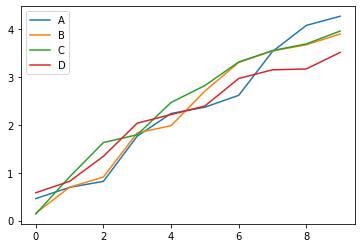

In [ ]:
cs.plot()
plt.show()

**Упражнение**   
Сгенерируйте случайную выборку $X_1, \ldots, X_n$ для $n = 100$ из стандартного нормального распределения, соберите из неё `pd.DataFrame`, замените случайные 10% элементов на пропуски (`np.nan`), а затем добавьте по столбцу для оценок первых 4 моментов кумулятивно — $$\frac{1}{m} \sum\limits_{i=1}^{m} X_i^{k}, \; i \in \overline{1, m}, \; m \in  \overline{1, n}, \; k \in \overline{1, 4}$$ 
Ваша функция должна корректно обрабатывать пропуски. В конце постройте график.

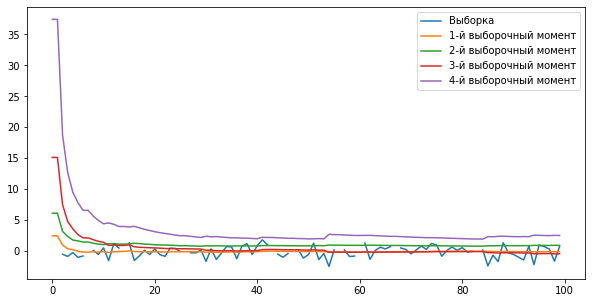

In [ ]:
# YOUR CODE

# генерируем выборку
n = 100
sample = sps.norm.rvs(size=n)

# создаем пропуски
index = np.random.choice(np.arange(n), int(0.1 * n), replace=True)
sample[index] = np.nan

# заводим dataframe
sample_df = pd.DataFrame(sample, columns=['Выборка'])


for k in range(1, 5):
    sample_df['{}-й выборочный момент'.format(k)] = (
        sample_df['Выборка'] ** k
    ).expanding().apply(np.nanmean)
    
sample_df.plot(figsize=(10, 5));

### 3. Чтение и запись данных

**Загрузка текстовых файлов табличного вида** производится с помощью функции `pd.read_csv`. Основные аргументы следующие:
* `filepath_or_buffer` &mdash; пусть к файлу;
* `sep` &mdash; разделитель колонок в строке (запятая, табуляция и т.д.);
* `header` &mdash; номер строки или список номеров строк, используемых в качестве имен колонок;
* `names` &mdash; список имен, которые будут использованы в качестве имен колонок;
* `index_col` &mdash; колонка, используемая в качестве индекса;
* `usecols` &mdash; список имен колонок, которые будут загружены;
* `nrows` &mdash; сколько строк прочитать;
* `skiprows` &mdash; номера строк с начала, которые нужно пропустить;
* `skipfooter` &mdash; сколько строк в конце пропустить;
* `na_values` &mdash; список значений, которые распознавать как пропуски;
* `parse_dates` &mdash; распознавать ли даты, можно передать номера строк;
* `date_parser` &mdash; парсер дат;
* `dayfirst` &mdash; день записывается перед месяцем или после;
* `thousands` &mdash; разделитель тысяч;
* `decimal` &mdash; разделитель целой и дробной частей;
* `comment` &mdash; символ начала комментария.

Полный список параметров:

`pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)`

**Загрузка таблиц формата Excel** производится с помощью функции `pd.read_excel`. Основные аргументы следующие:
* `io` &mdash; пусть к файлу;
* `sheetname` &mdash; какие листы таблицы загрузить;
* Остальные параметры аналогично.

`pd.read_excel(io, sheetname=0, header=0, skiprows=None, skip_footer=0, index_col=None, names=None, parse_cols=None, parse_dates=False, date_parser=None, na_values=None, thousands=None, convert_float=True, has_index_names=None, converters=None, dtype=None, true_values=None, false_values=None, engine=None, squeeze=False, **kwds)`

**Запись таблицы в текстовый файл** производится с помощью функции `df.to_csv`. Основные аргументы следующие:
* `df` &mdash; DataFrame, который нужно записать;
* `path_or_buf` &mdash; путь, куда записать;
* `sep` &mdash; разделитель колонок в строке (запятая, табуляция и т.д.);
* `na_rep` &mdash; как записать пропуски;
* `float_format` &mdash; формат записи дробных чисел;
* `columns` &mdash; какие колонки записать;
* `header` &mdash; как назвать колонки при записи;
* `index` &mdash; записывать ли индексы в файл;
* `index_label` &mdash; имена индексов, которые записать в файл.

Полный список параметров:

`df.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=False, date_format=None, doublequote=True, escapechar=None, decimal='.')`

**Запись таблицы в формат Excel** производится с помощью функции `df.to_excel`. Основные аргументы аналогичные. Полный список параметров:

`df.to_excel(excel_writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True, freeze_panes=None)`

### 4. Примеры чтения данных и работы с датами

Прочитаем файл, который содержит два столбца &mdash; дата и число. Столбцы разделяются табуляцией.

In [ ]:
df = pd.read_csv('./example.csv', sep='\t', parse_dates=[0])
df.head()

,Time,Value
0,2019-01-09,66
1,2019-02-09,34
2,2019-03-09,18
3,2019-04-09,32
4,2019-05-09,84


В информации о таблице видим, что дата определилась, т.к. формат колонки `Time` обозначен как `datetime64[ns]`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
Time     18 non-null datetime64[ns]
Value    18 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 416.0 bytes


Но при печати понимаем, что часть дат распозналась неправильно. Если число месяца меньше 13, то pandas путает день и месяц. В одном и том же столбце. Кошмар...

In [ ]:
df['Time']

0    2019-01-09
1    2019-02-09
2    2019-03-09
3    2019-04-09
4    2019-05-09
5    2019-06-09
6    2019-07-09
7    2019-08-09
8    2019-09-09
9    2019-10-09
10   2019-11-09
11   2019-12-09
12   2019-09-13
13   2019-09-14
14   2019-09-15
15   2019-09-16
16   2019-09-17
17   2019-09-18
Name: Time, dtype: datetime64[ns]

Укажем, что день всегда следует первым. Теперь все правильно

In [ ]:
df = pd.read_csv('./example.csv', sep='\t', parse_dates=[0],
                 dayfirst=True)
df['Time']

0    2019-09-01
1    2019-09-02
2    2019-09-03
3    2019-09-04
4    2019-09-05
5    2019-09-06
6    2019-09-07
7    2019-09-08
8    2019-09-09
9    2019-09-10
10   2019-09-11
11   2019-09-12
12   2019-09-13
13   2019-09-14
14   2019-09-15
15   2019-09-16
16   2019-09-17
17   2019-09-18
Name: Time, dtype: datetime64[ns]

Панды довольно ленивые, и если не попросить pandas распознать дату, то ничего делать не будет &mdash; оставит ее как `object`.

In [ ]:
df = pd.read_csv('./example.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
Time     18 non-null object
Value    18 non-null int64
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


Тогда можно воспользоваться функцией `pd.to_datetime`

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)
df['Time']

0    2019-09-01
1    2019-09-02
2    2019-09-03
3    2019-09-04
4    2019-09-05
5    2019-09-06
6    2019-09-07
7    2019-09-08
8    2019-09-09
9    2019-09-10
10   2019-09-11
11   2019-09-12
12   2019-09-13
13   2019-09-14
14   2019-09-15
15   2019-09-16
16   2019-09-17
17   2019-09-18
Name: Time, dtype: datetime64[ns]

Установим дату как индекс, получив временной ряд.

In [ ]:
df = df.set_index('Time')
df

,Value
Time,
2019-09-01,66
2019-09-02,34
2019-09-03,18
2019-09-04,32
2019-09-05,84
2019-09-06,27
2019-09-07,45
2019-09-08,84
2019-09-09,42


Его можно нарисовать

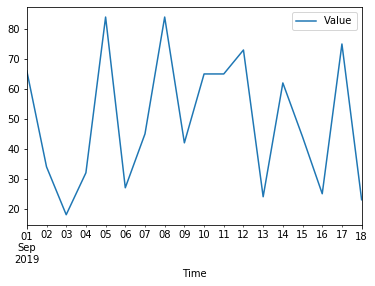

In [ ]:
df.plot();

Усреднение данных по трем дням

In [ ]:
df.resample('3D').mean()

,Value
Time,
2019-09-01,39.333333
2019-09-04,47.666667
2019-09-07,57.000000
2019-09-10,67.666667
2019-09-13,43.333333
2019-09-16,41.000000


### 5. Интервалы времени

Интервал времени задается объектом `pd.Timedelta`

Возможные обозначения интервалов: `'Y', 'M', 'W', 'D', 'days', 'day', 'hours', hour', 'hr', 'h', 'm', 'minute', 'min', 'minutes', 'T', 'S', 'seconds', 'sec', 'second', 'ms', 'milliseconds', 'millisecond', 'milli', 'millis', 'L', 'us', 'microseconds', 'microsecond', 'micro', 'micros', 'U', 'ns', 'nanoseconds', 'nano', 'nanos', 'nanosecond', 'N'`

Например, интервал времени в 5 недель 6 дней 5 часов 37 минут 23 секунды 12 милисекунд:

In [ ]:
pd.Timedelta('5W 6 days 5hr 37min 23sec 12ms')

Timedelta('41 days 05:37:23.012000')

Поробуем понять что такое `Y` и `M`.

In [ ]:
pd.Timedelta('1Y'), pd.Timedelta('1M')

(Timedelta('365 days 05:49:12'), Timedelta('0 days 00:01:00'))

Символ `Y` обозначает год. Он сделан таким из-за високосных годов. Поскольку месяцы разной длины, то их вообще нельзя здесь задать. Поэтому `M` обозначает минуты.

Интервал можно добавить к какой-нибудь дате, или вычесть из нее.

In [ ]:
pd.to_datetime('2019.09.18 18:30') \
    + pd.Timedelta('8hr 37min 23sec 12ms')

Timestamp('2019-09-19 03:07:23.012000')

In [ ]:
pd.to_datetime('2019.09.18 18:30') \
    - pd.Timedelta('20hr 50min 23sec 12ms')

Timestamp('2019-09-17 21:39:36.988000')

Сделать регулярный список дат позволяет функция `pd.timedelta_range`, которая реализует функционал `range` для дат. Ей нужно передать **ровно три аргумента** из следующих четырех:
* `start` &mdash; интервал начала отчета;
* `end` &mdash; интервал окончания отчета;
* `periods` &mdash; количество интервалов;
* `freq` &mdash; частота отсчета.

**Пример** 
<img src="https://mipt-stats.gitlab.io/images/m/temperature.jpg" width="140" align="right">  
Врач на протяжении дня измеряет пациенту температуру каждые 3 часа в течение 2 недель. Также пациенту необходимо спать с 11 вечера до 7 утра. Каждый день измерения температуры начинаются в 8 часов. Первое измерение 22 марта 2020 года. Определите моменты времени, когда нужно измерить пациенту температуру.

In [ ]:
# Периоды измерения температуры днем
periods = pd.timedelta_range(start='8H', freq='3H', end='23H')
periods

TimedeltaIndex(['08:00:00', '11:00:00', '14:00:00', '17:00:00', '20:00:00',
                '23:00:00'],
               dtype='timedelta64[ns]', freq='3H')

In [ ]:
# Даты измерний температуры
dates = pd.to_datetime('2020.03.22') \
    + pd.timedelta_range(start=0, freq='1D', end='2W')
dates

DatetimeIndex(['2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04', '2020-04-05'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Время измерния температуры
n, m = len(dates), len(periods)
dates_new = dates.repeat(m)
periods_new = pd.to_timedelta(np.tile(periods, n))
time = dates_new + periods_new
time

DatetimeIndex(['2020-03-22 08:00:00', '2020-03-22 11:00:00',
               '2020-03-22 14:00:00', '2020-03-22 17:00:00',
               '2020-03-22 20:00:00', '2020-03-22 23:00:00',
               '2020-03-23 08:00:00', '2020-03-23 11:00:00',
               '2020-03-23 14:00:00', '2020-03-23 17:00:00',
               '2020-03-23 20:00:00', '2020-03-23 23:00:00',
               '2020-03-24 08:00:00', '2020-03-24 11:00:00',
               '2020-03-24 14:00:00', '2020-03-24 17:00:00',
               '2020-03-24 20:00:00', '2020-03-24 23:00:00',
               '2020-03-25 08:00:00', '2020-03-25 11:00:00',
               '2020-03-25 14:00:00', '2020-03-25 17:00:00',
               '2020-03-25 20:00:00', '2020-03-25 23:00:00',
               '2020-03-26 08:00:00', '2020-03-26 11:00:00',
               '2020-03-26 14:00:00', '2020-03-26 17:00:00',
               '2020-03-26 20:00:00', '2020-03-26 23:00:00',
               '2020-03-27 08:00:00', '2020-03-27 11:00:00',
               '2020-03-

## Операции в pandas

In [2]:
import scipy.stats as sps

### 1. Простые операции

Сгенерируем случайные числа и представим их в виде `DataFrame`.

In [ ]:
df = pd.DataFrame(sps.norm.rvs(size=(10, 4)), 
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.345702,1.583271,0.480914,-0.053891
1,-1.513222,0.389656,0.448918,-0.265700
2,0.817235,-1.573969,-0.080860,2.160590
3,-0.773110,0.569715,0.078057,-0.215249
4,-0.178111,0.286518,0.035825,0.805861
5,0.849732,-0.182298,-0.224015,0.208410
6,-1.701552,-0.586663,-1.313644,0.470541
7,-0.373508,-0.813824,-0.251265,-0.834696
8,-0.745802,-0.160359,-0.934386,-0.358681
9,-1.116177,0.229204,-2.352976,-0.348601


Выведем описательные статистики по столбцам &mdash; количество значений, среднее, стандартное отклонение (корень из дисперсии), минимум, квантили, максимум.

In [ ]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.608022,-0.025875,-0.411343,0.156858
std,0.898149,0.859838,0.882121,0.843477
min,-1.701552,-1.573969,-2.352976,-0.834696
25%,-1.288321,-0.485572,-0.763606,-0.327876
50%,-0.759456,0.034423,-0.152438,-0.134570
75%,-0.226960,0.363871,0.067499,0.405008
max,0.849732,1.583271,0.480914,2.160590


Среднее по столбцам

In [ ]:
df.mean()

A   -0.608022
B   -0.025875
C   -0.411343
D    0.156858
dtype: float64

Оценка матрицы корреляций значений в столбцах

In [ ]:
df.corr()

,A,B,C,D
A,1.000000,-0.524331,0.210587,0.522391
B,-0.524331,1.000000,0.240015,-0.474598
C,0.210587,0.240015,1.000000,0.154964
D,0.522391,-0.474598,0.154964,1.000000


Применение функции к данным.
Для примера посчитаем разброс значений &mdash; разница максимума и минимума.

In [ ]:
df.apply(lambda x: x.max() - x.min())

A    2.551284
B    3.157239
C    2.833890
D    2.995285
dtype: float64

### 2. Объединение таблиц

#### 2.1 Функция `df.append`

Добавление строк в виде таблицы `other` в таблицу `df`. При наличии у новых строк колонок, которых нет в таблице, они добавляются в таблицу.

`df.append(other, ignore_index=False, verify_integrity=False, sort=None)`

* `df` &mdash; таблица;
* `other` &mdash; добавляемые строки в виде таблицы;
* `ignore_index` &mdash; сохранить индексы или определить и как $0, ..., n-1$;
* `verify_integrity` &mdash; если `True`, то создает исключение в случае повторения индексов;
* `sort` &mdash;  сортировать ли колонки, если они (или их порядок) различаются.

---------------

Создадим новую таблицу из первых четырех строк таблицы `df`. В новую таблицу добавим колонку `flag`, в которую запишем условие, что число в столбце D положительно. Затем добавим строки из новой таблицы к старой. Полученная таблица содержит пропуски, которые отмечены как `NaN`.

In [ ]:
other = df[:4].copy()  # Полное копирование
other['flag'] = other['D'] > 0
other['D'] = other['D'] ** 2

df.append(other, ignore_index=True, sort=False)

,A,B,C,D,flag
0,-1.345702,1.583271,0.480914,-0.053891,NaN
1,-1.513222,0.389656,0.448918,-0.265700,NaN
2,0.817235,-1.573969,-0.080860,2.160590,NaN
3,-0.773110,0.569715,0.078057,-0.215249,NaN
4,-0.178111,0.286518,0.035825,0.805861,NaN
5,0.849732,-0.182298,-0.224015,0.208410,NaN
6,-1.701552,-0.586663,-1.313644,0.470541,NaN
7,-0.373508,-0.813824,-0.251265,-0.834696,NaN
8,-0.745802,-0.160359,-0.934386,-0.358681,NaN
9,-1.116177,0.229204,-2.352976,-0.348601,NaN


### 2.2 Функция `pd.concat`

Соединение таблиц вдоль выбранной оси

`pd.concat(objs, axis=0, join='outer', ignore_index=False, copy=True, ...)`

* `objs` &mdash; объединяемые таблицы;
* `axis` : {`0` или `'index'`, `1` или `'columns'`} &mdash; ось индексов или ось колонок, иными словами соединение по вертикали или по горизонтали;
* `join` : {`'inner'`, `'outer'`} &mdash; тип объединения &mdash; пересечение или объединение индексов/колонок;
* `ignore_index` &mdash; сохранить индексы или определить и как $0, ..., n-1$;
* `copy` &mdash; копировать данные или нет.

------------

Простой пример соединения таблиц:

In [ ]:
pd.concat([df[:5], df[5:]])

,A,B,C,D
0,-1.345702,1.583271,0.480914,-0.053891
1,-1.513222,0.389656,0.448918,-0.265700
2,0.817235,-1.573969,-0.080860,2.160590
3,-0.773110,0.569715,0.078057,-0.215249
4,-0.178111,0.286518,0.035825,0.805861
5,0.849732,-0.182298,-0.224015,0.208410
6,-1.701552,-0.586663,-1.313644,0.470541
7,-0.373508,-0.813824,-0.251265,-0.834696
8,-0.745802,-0.160359,-0.934386,-0.358681
9,-1.116177,0.229204,-2.352976,-0.348601


### 2.3 Функции `pd.merge` и `df.join`

Слияние таблиц по вертикали путем выполнения операций слияния баз данных в стиле SQL.

`pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, suffixes=('_x', '_y'), ...)`

* `left` и `right` &mdash; объединяемые таблицы.
* `how` &mdash; тип объединения:
    * `left` &mdash; только по ключам из левой таблицы == *SQL left outer join*;
    * `right` &mdash; только по ключам из правой таблицы == *SQL right outer join*;
    * `outer` &mdash; по объединению ключей == *SQL full outer join*;
    * `inner` &mdash; по пересечению ключей == *SQL inner join*.
* `on` &mdash; имя (или имена) колонок, по которым будет производиться объединение (т.е. ключи). Если их несколько, то нужно передать список имен. Имена колонок в таблице должны совпадать.
* `left_on` и `right_on` &mdash; аналогично `on` для случая, когда в таблицах различаются имена колонок, соответствующие ключам.
* `left_index` и `right_index` &mdash; использовать ли индексы в качестве ключей.
* `suffixes` &mdash; суффиксы, которые будут добавлены к тем колонкам, имена которых повторяются.

*Пример.* Опция `how=left, left_on='A', right_on='B'` соответствует взятию всех строк из таблицы `left`, а из таблицы `right` берутся те строки, в которых значения в колонке `A` таблицы `left` совпадает со значением колонки `B` таблицы `right`. Если в одной из таблиц таких значений несколько, то строки другой таблицы дублируются. Если в таблице `right` каких-то значений нет, то в результирующей таблице будут пропуски.

`df.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)`

* `df` &mdash; основная таблица. В качестве ключей используется индекс.
* `other` &mdash; другая таблица.
* `on` &mdash; колонка(-и) в `other`, соответствующая ключам, по ним происходит объедиенение. Если `None`, то используется индекс.
* `how` &mdash; тип объединения (см. `pd.merge`).
* `lsuffix` и `rsuffix` &mdash; суффиксы, которые будут добавлены к тем колонкам, имена которых повторяются.

------------------

##### Пример 1.

В обеих таблицах ключи повторяются

In [ ]:
left = pd.DataFrame({'key': ['A', 'A'], 
                     'lval': [1, 2]})
right = pd.DataFrame({'key': ['A', 'A'], 
                      'rval': [4, 5]})

In [ ]:
left

,key,lval
0,A,1
1,A,2


In [ ]:
right

,key,rval
0,A,4
1,A,5


В результате объединения получаем 4 строки &mdash; для каждой строки из левой таблице есть две строки из правой таблицы с таким же ключом.

In [ ]:
pd.merge(left, right, on='key')

,key,lval,rval
0,A,1,4
1,A,1,5
2,A,2,4
3,A,2,5


###### Пример 2.

В таблицах ключи не повторяются

In [ ]:
left = pd.DataFrame({'key': ['A', 'B'], 
                     'lval': [1, 2]})
right = pd.DataFrame({'key': ['A', 'B'], 
                      'rval': [4, 5]})

In [ ]:
left

,key,lval
0,A,1
1,B,2


In [ ]:
right

,key,rval
0,A,4
1,B,5


В результате объединения получаем 2 строки &mdash; для каждой строки из левой таблице есть только одна строка из правой таблицы с таким же ключом.

In [ ]:
pd.merge(left, right, on='key')

,key,lval,rval
0,A,1,4
1,B,2,5


###### Пример 3.

Посмотрим на различные типы объединения. Сооздадим и напечатаем две таблицы.

In [ ]:
left = pd.DataFrame({'lkey': ['A', 'B', 'C', 'A'], 
                     'value': range(4)})
right = pd.DataFrame({'rkey': ['A', 'B', 'D', 'B'], 
                      'value': range(4, 8)})

In [ ]:
left

,lkey,value
0,A,0
1,B,1
2,C,2
3,A,3


In [ ]:
right

,rkey,value
0,A,4
1,B,5
2,D,6
3,B,7


**Внешнее слияние** &mdash; используются ключи из объединения списков ключей. Иначе говоря, используются ключи, которые есть хотя бы в одной из таблиц. Если в другой таблице таких ключей нет, то ставятся пропуски.

In [ ]:
pd.merge(left, right, 
         left_on='lkey', right_on='rkey', how='outer')

,lkey,value_x,rkey,value_y
0,A,0.0,A,4.0
1,A,3.0,A,4.0
2,B,1.0,B,5.0
3,B,1.0,B,7.0
4,C,2.0,NaN,NaN
5,NaN,NaN,D,6.0


**Внутреннее слияние** &mdash; используются ключи из пересечения списков ключей. Иначе говоря, используются ключи, которые присутствуют в обеих таблицах.

In [ ]:
pd.merge(left, right, 
         left_on='lkey', right_on='rkey', how='inner')

,lkey,value_x,rkey,value_y
0,A,0,A,4
1,A,3,A,4
2,B,1,B,5
3,B,1,B,7


**Объединение по ключам левой таблицы.** Не используются ключи, которые есть в правой таблицы, но которых нет в левой. Если в правой таблице каких-то ключей нет, то ставятся пропуски.

In [ ]:
pd.merge(left, right, 
         left_on='lkey', right_on='rkey', how='left')

,lkey,value_x,rkey,value_y
0,A,0,A,4.0
1,B,1,B,5.0
2,B,1,B,7.0
3,C,2,NaN,NaN
4,A,3,A,4.0


**Объединение по ключам правой таблицы.** Не используются ключи, которые есть в левой таблицы, но которых нет в правой. Если в левой таблице каких-то ключей нет, то ставятся пропуски.

In [ ]:
pd.merge(left, right, 
         left_on='lkey', right_on='rkey', how='right')

,lkey,value_x,rkey,value_y
0,A,0.0,A,4
1,A,3.0,A,4
2,B,1.0,B,5
3,B,1.0,B,7
4,NaN,NaN,D,6


Выполним внтуреннее объединение и установим ключ качестве индекса

In [ ]:
pd.merge(left, right, 
         left_on='lkey', right_on='rkey', how='inner') \
        .set_index('lkey')[['value_x', 'value_y']]

,value_x,value_y
lkey,,
A,0,4
A,3,4
B,1,5
B,1,7


Ту же операцию можно выполнить с помощью `join`

In [ ]:
left.set_index('lkey') \
    .join(right.set_index('rkey'), rsuffix='_r', how='inner')

,value,value_r
A,0,4
A,3,4
B,1,5
B,1,7


### 3. Группировка

Часто на практике необходимо вычислять среднее по каким-либо категориям или группам в данных. Группа может определяться, например, столбцом в таблице, у которого не так много значений. Мы хотели бы для каждого такого значения посчитать среднее значение другой колонки данных в этой группе.

Этапы группировки данных:

* разбиение данных на группы по некоторым критериям;
* применение функции отдельно к каждой группе;
* комбинирование результата в структуру данных.

Группировка выполняется функцией

`df.groupby(by=None, axis=0, level=None, sort=True, ...)`

* `df` &mdash; таблица, данные которой должны быть сгруппированы;
* `by` &mdash; задает принцип группировки. Чаще всего это имя столбца, по которому нужно сгруппировать. Может так же быть функцией;
* `axis` &mdash; ось (0 = группировать строки, 1 = группировать столбцы);
* `level` &mdash; если ось представлена мультииндексом, то указывает на уровень мультииндекса;
* `sort` &mdash; сортировка результата по индексу.

Результатом группировки является объект, состоящий из пар (имя группы, подтаблица). Имя группы соответствует значению, по которому произведена группировка. К объекту-результату группировки применимы, например, следующие операции:

* `for name, group in groupped: ... ` &mdash; цикл по группам;
* `get_group(name)` &mdash; получить таблицу, соответствующую группе с именем `name`;
* `groups` &mdash; получить все группы в виде словаря имя-подтаблица;
* `count()` &mdash; количество значений в группах, исключая пропуски;
* `size()` &mdash; размер групп;
* `sum()`, `max()`, `min()`;
* `mean()`, `median()`, `var()`, `std()`, `corr()`, `quantile(q)`;
* `describe()` &mdash; вывод описательных статистик;
* `aggregate(func)` &mdash; применение функции (или списка функций) `func` к группам.
---------

Создадим таблицу для примера

In [ ]:
df = pd.DataFrame({
    'Животное' : ['Котик', 'Песик', 'Котик', 'Песик',
                  'Котик', 'Песик', 'Котик', 'Песик'],
    'Цвет шерсти' : ['белый', 'белый', 'коричневый', 'черный',
                     'коричневый', 'коричневый', 'белый', 'черный'],
    'Рост' : sps.gamma(a=12, scale=3).rvs(size=8),
    'Длина хвостика' : sps.gamma(a=10).rvs(size=8)
})

df

,Животное,Цвет шерсти,Рост,Длина хвостика
0,Котик,белый,33.756262,8.498897
1,Песик,белый,35.634198,7.056738
2,Котик,коричневый,30.892027,17.375188
3,Песик,черный,23.272997,4.179033
4,Котик,коричневый,33.002035,12.200925
5,Песик,коричневый,41.045798,14.026990
6,Котик,белый,42.275420,7.053550
7,Песик,черный,31.761933,10.652498


##### Пример 1.

Если все котики встанут друг на друга, то какой их суммарный рост? А у песиков? А какова суммарная длинна хвостиков у котиков и у песиков?

Группировка по одной колонке и последующее применение операции суммирования:

In [ ]:
df.groupby('Животное').sum()

,Рост,Длина хвостика
Животное,,
Котик,139.925743,45.12856
Песик,131.714925,35.91526


Посчитаем описательные статистики для каждого животного

In [ ]:
df.groupby('Животное').describe()

Рост                                                        \
         count       mean       std        min        25%        50%   
Животное                                                               
Котик      4.0  34.981436  5.011472  30.892027  32.474533  33.379148   
Песик      4.0  32.928731  7.478880  23.272997  29.639699  33.698065   

                               Длина хвостика                                 \
                75%        max          count       mean       std       min   
Животное                                                                       
Котик     35.886051  42.275420            4.0  11.282140  4.604231  7.053550   
Песик     36.987098  41.045798            4.0   8.978815  4.282428  4.179033   

                                                     
               25%        50%        75%        max  
Животное                                             
Котик     8.137560  10.349911  13.494491  17.375188  
Песик     6.337312   8.854618  11.496121  14.026990

##### Пример 2.

Теперь предположим, что котики и песики встают только на представителей своего вида и своего цвета шерсти. Что тогда будет?

Группировка по двум колонкам и последующее применение операции суммирования

In [ ]:
df.groupby(['Животное', 'Цвет шерсти']).sum()

Рост  Длина хвостика
Животное Цвет шерсти                           
Котик    белый        76.031682       15.552447
         коричневый   63.894061       29.576113
Песик    белый        35.634198        7.056738
         коричневый   41.045798       14.026990
         черный       55.034930       14.831531

Полученная таблица имеет *мультииндекс*

In [ ]:
df.groupby(['Животное', 'Цвет шерсти']).sum().index

MultiIndex([('Котик',      'белый'),
            ('Котик', 'коричневый'),
            ('Песик',      'белый'),
            ('Песик', 'коричневый'),
            ('Песик',     'черный')],
           names=['Животное', 'Цвет шерсти'])

### 4. Таблицы сопряженности (Crosstab) и сводные таблицы (Pivot table)

**Задача.** В медицинской клинике информацию о приемах записывают в таблицу со следующими полями:
* время приема,
* врач,
* пациент,
* поставленный диагноз,
* назначение,
* другие поля.

Требуется посчитать, сколько раз за предыдущий месяц каждый врач ставил какой-либо диагноз. Результаты представить в виде таблицы, в которой посчитать также суммы по строкам и столбцам, т.е. сколько врач сделал приемов за месяц и сколько раз конкретный диагноз поставлен всеми врачами.

Как решать?

**Способ 1** 
1. Группировка по врачам.
2. Для каждого врача группировка по диагнозам.
3. В каждой группе вычисление суммы.
4. Соединение в одну таблицу.
5. Вычисление суммы по столбцам и по строкам.

Можете прикинуть количество строк кода и время работы &#128513;

**Способ 2**
1. Создать пустую таблицу.
2. Циклом &#129315; по всем записям исходной таблицы считать суммы.
3. Вычисление суммы по столбцам и по строкам.

И снова можете прикинуть количество строк кода и время работы &#128513;

**Способ 3**

Применить умную функцию из pandas, которая сделает все сама!

---------------

#### 4.1 Функция `pd.crosstab`

Эксель-подобные таблицы сопряженности

`pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)`

* `index` &mdash; значения для группировки по строкам;
* `columns` &mdash; значения для группировки по столбцам;
* `values` &mdash; аггригируемый столбец (или столбцы), его значения непосредственно определяют значения таблицы сопряженности;
* `aggfunc` &mdash; функция, которая будет применена к каждой группе значений `values`, сгруппированным по значениям`index` и `columns`. Значения этой функции и есть значения сводной таблицы;
* `rownames` и `colnames` &mdash; имена строк и столбцов таблицы сопряженности;
* `margins` &mdash; добавляет результирующий столбец/строку;
* `margins_name` &mdash; имя результирующего столбец/строку;
* `dropna` &mdash; не включать столбцы, которые состоят только из `NaN`;
* `normalize`: `boolean`, {`'all'`, `'index'`, `'columns'`} &mdash; нормировка всей таблицы (или только по строкам/столбцам).

В примере выше:

`pd.crosstab(df['Врач'], df['Диагноз'], margins=True)`

#### 4.2 Функция `pd.pivot_table`

Эксель-подобные сводные таблицы

`pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')`

* `data` &mdash; исходная таблица;
* `values` &mdash; аггригируемый столбец, его значения непосредственно определяют значения сводной таблицы;
* `index` &mdash; ключи для группировки, относятся к индексам сводной таблицы;
* `columns` &mdash; ключи для группировки, относятся к столбцам сводной таблицы;
* `aggfunc` &mdash; функция, которая будет применена к каждой группе значений `values`, сгруппированным по значениям `index` и `columns`. Значения этой функции и есть значения сводной таблицы. Если передается список функций, то сводная таблица имеет иерархические имена колонок, верхние значения которых &mdash; имена функций;
* `fill_value` &mdash; значения для замены пропусков;
* `dropna` &mdash; не включать столбцы, которые состоят только из `NaN`;
* `margins` &mdash; добавляет результирующий столбец/строку;
* `margins_name` &mdash; имя результирующего столбец/строку.

В примере выше:

`pd.pivot_table(df, index='врач', columns='диагноз', margins=True)`

-------------

#### 4.3 Примеры

Создадим таблицу для примера

In [ ]:
df = pd.DataFrame({
    'Специальность' : ['Ветеринар', 'Ветеринар', 
                       'Психолог', 'Психолог'] * 6,
    'Врач' : ['Андрей', 'Сергей', 'Ирина'] * 8,
    'Диагноз' : ['Простуда', 'Простуда', 'Простуда', 
                 'Волнения', 'Волнения', 'Простуда'] * 4,
    'Доза' : sps.randint(low=1, high=6).rvs(size=24),
    'Продолжительность' : sps.randint(low=1, high=6).rvs(size=24)
})

df

,Специальность,Врач,Диагноз,Доза,Продолжительность
0,Ветеринар,Андрей,Простуда,5,1
1,Ветеринар,Сергей,Простуда,5,2
2,Психолог,Ирина,Простуда,5,5
3,Психолог,Андрей,Волнения,3,5
4,Ветеринар,Сергей,Волнения,1,4
5,Ветеринар,Ирина,Простуда,5,3
6,Психолог,Андрей,Простуда,2,2
7,Психолог,Сергей,Простуда,4,1
8,Ветеринар,Ирина,Простуда,5,5
9,Ветеринар,Андрей,Волнения,2,4


Посчитаем, сколько раз какой врач ставил каждый из диагнозов, а также суммы по строкам и столбцам

In [ ]:
pd.crosstab(df['Врач'], df['Диагноз'], margins=True)

Диагноз,Волнения,Простуда,All
Врач,,,
Андрей,4,4,8
Ирина,0,8,8
Сергей,4,4,8
All,8,16,24


Посчитаем, какую среднюю дозу какой врач назначал по каждому из диагнозов

In [ ]:
pd.crosstab(df['Врач'], df['Диагноз'], 
            values=df['Доза'], aggfunc=np.mean)

Диагноз,Волнения,Простуда
Врач,,
Андрей,3.75,3.50
Ирина,NaN,3.50
Сергей,2.50,4.25


Простейший вариант сводной таблицы &mdash; среднее в группах, определяемых столбцом. Посчитаем средние по каждому врачу

In [ ]:
pd.pivot_table(df, index=['Врач'])

,Доза,Продолжительность
Врач,,
Андрей,3.625,3.500
Ирина,3.500,3.875
Сергей,3.375,3.000


Посчитаем, сколько раз врач и в какой специальности ставил тот или иной диагноз

In [ ]:
pd.pivot_table(df, 
               values='Доза', 
               index=['Специальность', 'Врач'],
               columns=['Диагноз'], 
               aggfunc=np.sum)

Диагноз               Волнения  Простуда
Специальность Врач                      
Ветеринар     Андрей       7.0       8.0
              Ирина        NaN      13.0
              Сергей       5.0      10.0
Психолог      Андрей       8.0       6.0
              Ирина        NaN      15.0
              Сергей       5.0       7.0

Добавим строчку, являющейся суммой столбцов, и столбец, являющийся суммой строк

In [ ]:
pd.pivot_table(df, 
               values='Доза', 
               index=['Специальность', 'Врач'],
               columns=['Диагноз'],
               aggfunc=np.sum, 
               margins=True)

Диагноз               Волнения  Простуда  All
Специальность Врач                           
Ветеринар     Андрей       7.0       8.0   15
              Ирина        NaN      13.0   13
              Сергей       5.0      10.0   15
Психолог      Андрей       8.0       6.0   14
              Ирина        NaN      15.0   15
              Сергей       5.0       7.0   12
All                       25.0      59.0   84

Применим несколько функций и несколько столбцов со значениями

In [ ]:
pd.pivot_table(df, 
               values=['Доза', 'Продолжительность'], 
               index=['Специальность', 'Врач'],
               columns=['Диагноз'], 
               aggfunc=[np.min, np.mean, np.max], 
               margins=True)

amin                                              \
                         Доза              Продолжительность                
Диагноз              Волнения Простуда All          Волнения Простуда All   
Специальность Врач                                                          
Ветеринар     Андрей      2.0      3.0   2               4.0      1.0   1   
              Ирина       NaN      1.0   1               NaN      2.0   2   
              Сергей      1.0      5.0   1               4.0      2.0   2   
Психолог      Андрей      3.0      2.0   2               5.0      1.0   1   
              Ирина       NaN      3.0   3               NaN      2.0   2   
              Сергей      2.0      3.0   2               1.0      1.0   1   
All                       1.0      1.0   1               1.0      1.0   1   

                         mean                                            \
                         Доза                Продолжительность            
Диагноз              Волнения Простуда   All          Волнения Простуда   
Специальность Врач                                                        
Ветеринар     Андрей    3.500   4.0000  3.75               4.5   3.0000   
              Ирина       NaN   3.2500  3.25               NaN   3.7500   
              Сергей    2.500   5.0000  3.75               4.0   3.0000   
Психолог      Андрей    4.000   3.0000  3.50               5.0   1.5000   
              Ирина       NaN   3.7500  3.75               NaN   4.0000   
              Сергей    2.500   3.5000  3.00               2.5   2.5000   
All                     3.125   3.6875  3.50               4.0   3.1875   

                                   amax                                 \
                                   Доза              Продолжительность   
Диагноз                    All Волнения Простуда All          Волнения   
Специальность Врач                                                       
Ветеринар     Андрей  3.750000      5.0      5.0   5               5.0   
              Ирина   3.750000      NaN      5.0   5               NaN   
              Сергей  3.500000      4.0      5.0   5               4.0   
Психолог      Андрей  3.250000      5.0      4.0   5               5.0   
              Ирина   4.000000      NaN      5.0   5               NaN   
              Сергей  2.500000      3.0      4.0   4               4.0   
All                   3.458333      5.0      5.0   5               5.0   

                                   
                                   
Диагноз              Простуда All  
Специальность Врач                 
Ветеринар     Андрей      5.0   5  
              Ирина       5.0   5  
              Сергей      4.0   4  
Психолог      Андрей      2.0   5  
              Ирина       5.0   5  
              Сергей      4.0   4  
All                       5.0   5

## Data analysis

Пусть нам попались какие-то данные.

В данном случае - 100 различных значений какой-то величины.

In [ ]:
size = 100
sample = sps.norm.rvs(size=size) #генерируем реализацию выборки из стандартного нормального распределения

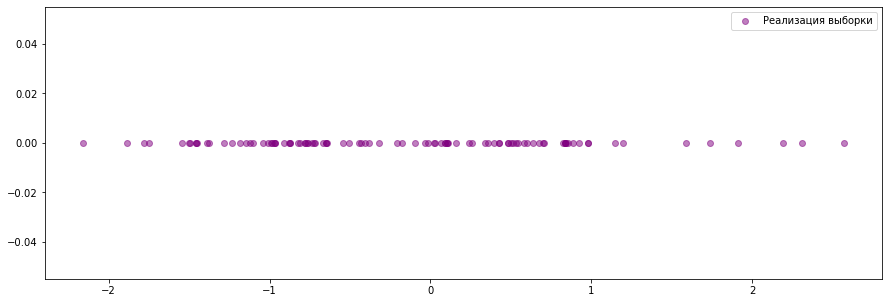

In [ ]:
# рисуем график
# по оси x - значения реализаций случайной величины

plt.figure(figsize=(15, 5))
plt.scatter(sample, np.zeros(size), alpha=0.5, color='purple', label="Реализация выборки")
plt.legend()
plt.show()

Для начала давайте попробуем прикинуть, как распределены данные:

## Гистограмма

Идея: разделим всю числовую прямую на несколько "корзин" и посмотрим, сколько объектов попало в каждую.

Формально: $X_1, \ldots X_n$ - выборка.

$-\infty = a_0 < \ldots < a_i < \ldots < a_{m} = +\infty$ - разбиение на $m$ корзин.

$n_k = \sum \limits_{i=0}^{n-1} I(X_i \in [a_k, a_{k+1}])$ - количество элементов в $i$-й корзине.


Можно построить график в виде столбиков, где высота столбика показывает, сколько объектов попало в соответствующую корзину.

Этот график по форме похож на график плотности распределения нашей случайной величины.



Гистограмму можно построить с помощью библиотеки matplotlib.

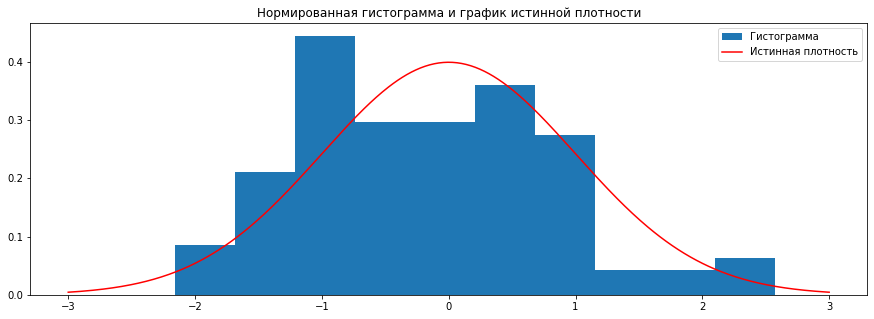

In [ ]:
plt.figure(figsize=(15, 5))

plt.title("Нормированная гистограмма и график истинной плотности")

plt.hist(x=sample, bins = 10, density=True, label = "Гистограмма") 
#x - данные, bins - количество корзин, density - нормируем, так что сумма высот столбиков равна 1

grid = np.linspace(-3, 3, 500)

plt.plot(grid, sps.norm.pdf(grid), color='red', label='Истинная плотность')

plt.legend()

plt.show()

Другой способ:

Для построения гистограммы удобно использовать библиотеку seaborn (подробнее - в туториалах).

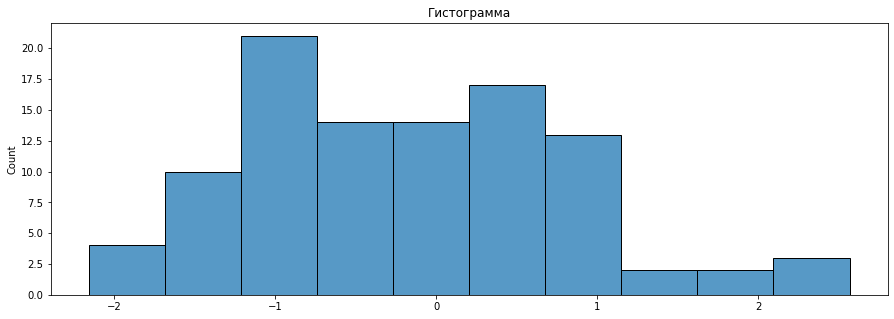

In [ ]:
plt.figure(figsize=(15, 5))

plt.title("Гистограмма")

sns.histplot(data=sample, bins = 10)
#data - наши данные, bins - количество корзин

plt.show()

Посмотрим, на что влияет количество корзин.

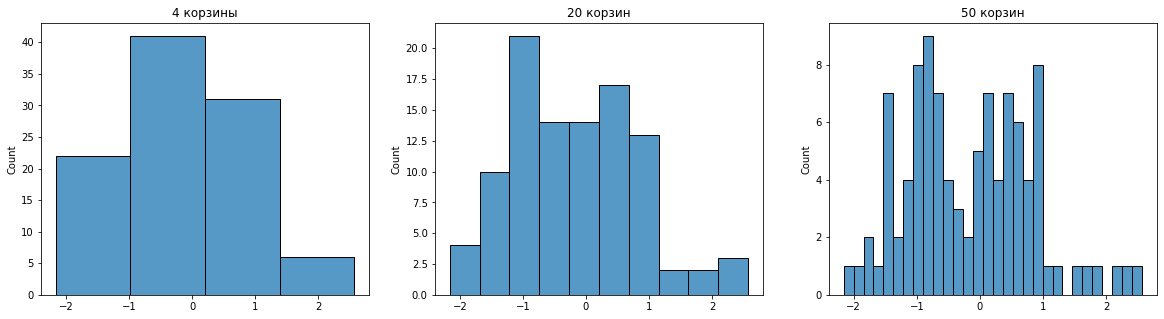

In [ ]:
fig, axs = plt.subplots(figsize=(20, 5), ncols=3)

axs[0].set_title("4 корзины" )
axs[1].set_title("20 корзин" )
axs[2].set_title("50 корзин" )


sns.histplot(data=sample, bins = 4, ax=axs[0])
sns.histplot(data=sample, bins = 10, ax=axs[1])
sns.histplot(data=sample, bins = 30, ax=axs[2])


#data - наши данные, bins - количество корзин

plt.show()

## Задание 1
Рассмотрим функцию `np.random.randint()`.

Выберите любые значения a и b и создайте массив рандомных чисел от a до b (размер массива 100).

Постройте гистограмму для этого массива.

Постройте более четкий график, увеличив параметр `bins`.

Создайте массив sizes, который будет сосстоять из 1e2, 1e3, 1e4, 1e5 (используйте `np.logspace()`). Числа должны быть целыми.

Постройте plt.subplots в виде строки из 4 графиков. Параметр `bins` укажите 100. На каждом графике отрисуйте гистограмму массива заданного размера из массива sizes. Подпишите, какой размер массивы к какому графику относится.

На какое распределение похоже?

## Задание 2*
Напишите собственную реализацию нормального распределения. Создайте класс и определите в нем функцию _pdf. Напомню, что плотность нормального распределения расчитывается следующим образом:
$$ \frac{1}{\sigma \sqrt{2 \pi}} exp \left( -\frac{(x-\mu)^2}{2 \sigma ^2}\right)$$
Для построения функции возьмите $\mu$ = 0, $\sigma$ = 1


Сгенерируйте выборку из 2000 элементов. Засеките время генерации выборки.

Постройте гистограмму для вашей выборки

Сравните время работы вашей реализации и реализации из `scipy.stats`

Как, используя вашу функцию, можно создавать выборки для других значений $\mu$ и $\sigma$? Проиллюстрируйте.

## Ядерная оценка плотности

KDE (kernel density estimation) - непараметричсекий способ оценивания случайной величины.

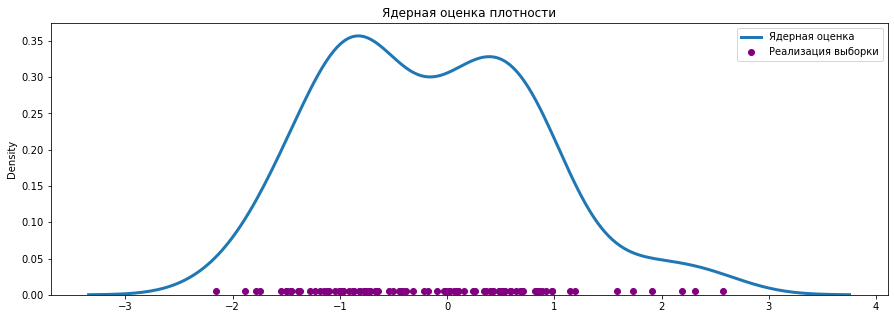

In [ ]:
plt.figure(figsize=(15, 5))

plt.title("Ядерная оценка плотности")

sns.kdeplot(data=sample, lw=3, label="Ядерная оценка")

plt.scatter(sample, np.zeros(size)+0.005, color='purple', label='Реализация выборки')

plt.legend()
plt.show()


Сравним график ядерной оценки с графиком истинной плотности.

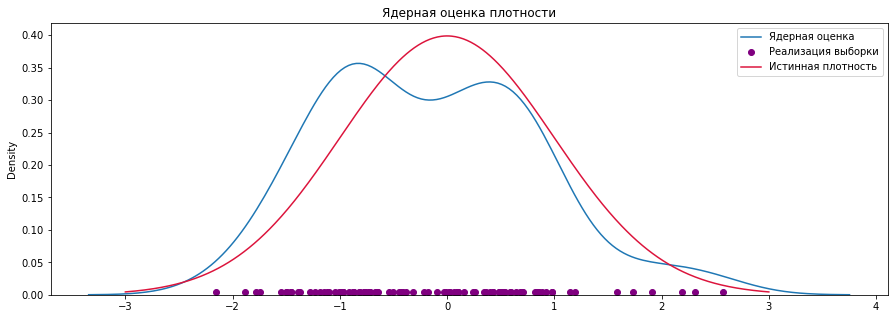

In [ ]:
plt.figure(figsize=(15, 5))

plt.title("Ядерная оценка плотности")

sns.kdeplot(data=sample, label="Ядерная оценка")

plt.scatter(sample, np.zeros(size)+0.005, color='purple', label='Реализация выборки')

plt.plot(grid, sps.norm.pdf(grid), color='crimson', label='Истинная плотность')


plt.legend()
plt.show()

Также метод histplot позволяет сразу строить и гистограмму, и ядерную оценку плотности.

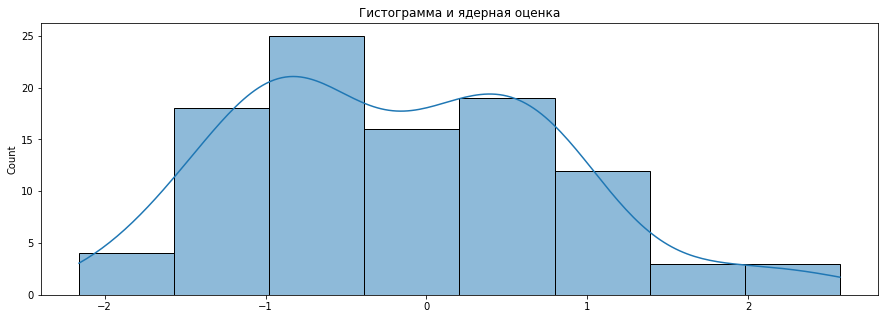

In [ ]:
plt.figure(figsize=(15, 5))

plt.title("Гистограмма и ядерная оценка")

sns.histplot(data=sample, kde=True)
plt.show()

## Точечные оценки

Рассмотрим **выборочное среднее**.

$\overline{X}  = \sum\limits_{i=1}^n X_i$

Сгенерируем выборку из $\mathcal{N}(3, 25)$ размера 1000:


In [ ]:
size = 1000
sample = sps.norm(loc=3, scale=5).rvs(size=size) #генерируем реализацию выборки из стандартного нормального распределения

Посчитаем выборочное среднее

In [ ]:
mean = sample.sum() / size

print("Выборочное среднее:", mean)

Выборочное среднее: 2.729321966255051


Что хорошего может нам дать эта величина?

Давайте посмотрим, как она ведет себя с ростом размера выборки!

Посчитаем выборочное среднее по всем префиксам выборки ($j \in {1, \ldots n}$):

$(\overline{X} )_j = \sum\limits_{i=1}^j X_i$

In [ ]:
means = sample.cumsum() / (np.arange(size) + 1)

Построим график зависимости среднего от размера префикса:

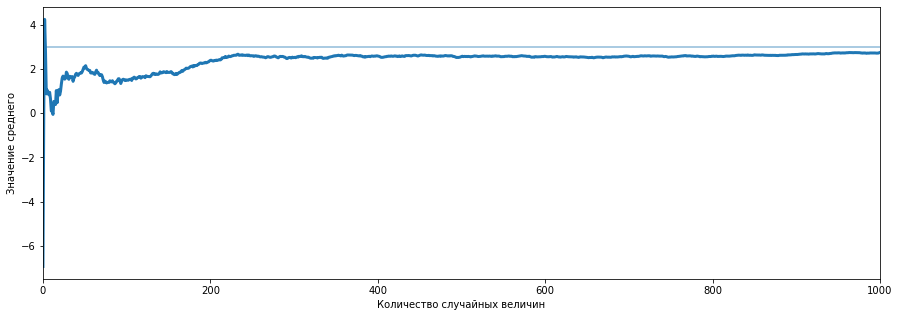

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(means, lw=3)
plt.hlines(3, 0, size, alpha=0.5)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Но одного эксперимента мало, чтобы понять свойства вероятностных объектов. **Запомните это!**

Повторим эксперимент 10 раз **независимо**.

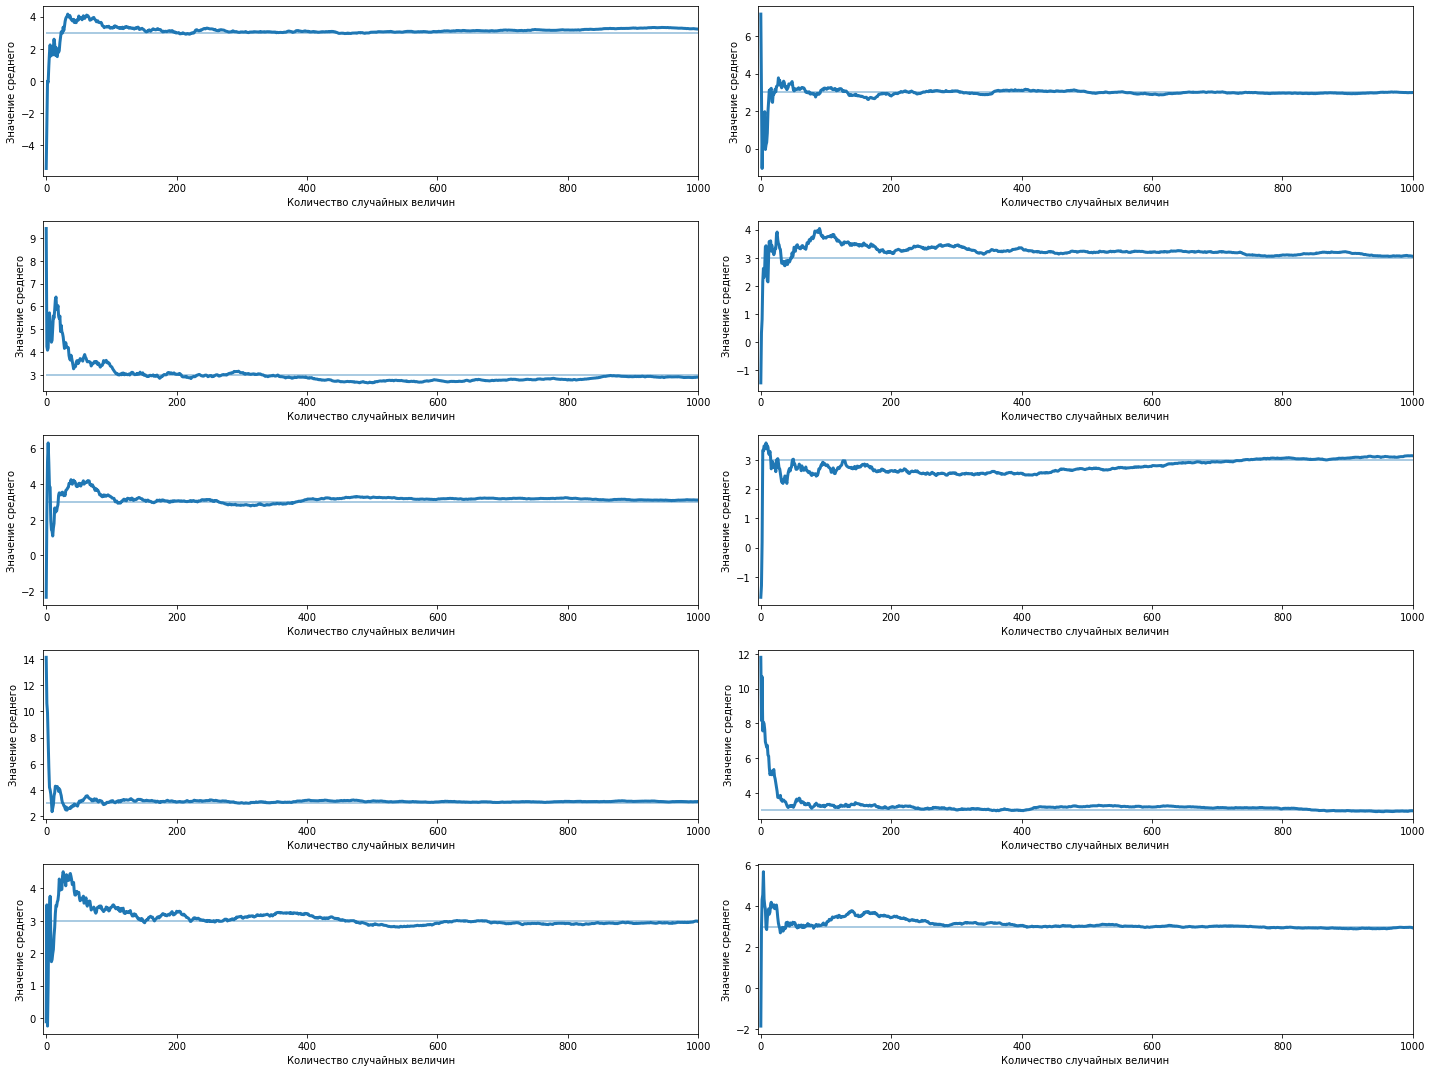

In [ ]:
plt.figure(figsize=(20, 15))

for i in range(10):

    # Генерация выборки и вычисление средних
    sample = sps.norm(loc=3, scale=5).rvs(size=size)
    means = sample.cumsum() / (np.arange(size) + 1)
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(means, lw=3)
    plt.hlines(3, 0, size, alpha=0.5)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
    
plt.tight_layout()

Как видим, со временем график среднего приближается к значению параметра $a$ нормального распределения.

Вспомним теорию вероятностей!

## Закон больших чисел

#### Формулировка

Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из некоторого распределения, причем $\mathsf{E}\xi_i = a$. Тогда выполнена сходимость $$\frac{\xi_1 + ... + \xi_n}{n} \stackrel{п.н.}{\longrightarrow} a.$$ 

*Замечание 1.* Закон больших чисел имеет несколько формулировок. Данная формулировка часто называется *усиленным законом больших чисел*. В частности, усиленной она является, поскольку в отличии от "простой" версии она не требует условия на дисперсии и утверждает о более сильной сходимости "почти наверное".

*Замечание 2.* Последовательность случайных величин $\xi_1, \xi_2, ...$ сходится почти наверное к случайной величине $\xi$, если $\mathsf{P}\big(\big\{ \omega \in \Omega\:\big|\: \xi_n(\omega) \to \xi(\omega)\big\}\big) = 1$

---

####  Визуализация

Убедимся в справедливости ЗБЧ, сгенерировав набор из случайных величин  $\xi_1, ..., \xi_{1000}$ и посчитав по нему среднее в зависимости от размера набора, то есть величины $S_{n} = \frac{1}{n}\sum\limits_{i=1}^n \xi_i$ для $1 \leqslant n \leqslant 1000$.

Для примера рассмотрим бернуллиевское распределение.







In [ ]:
size = 1000
samples_count = 500

sample = sps.bernoulli(p=0.5).rvs(size=(samples_count, size))
means = sample.cumsum(axis=1) / (np.arange(size) + 1)

Нарисуем траектории среднего для всех реализациий на одном графике.

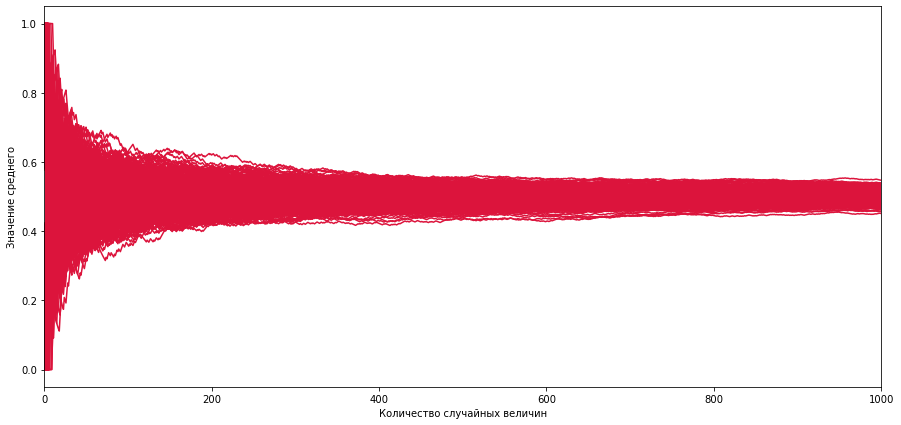

In [ ]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson')
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

В подобных "тяжелых" графиках нужно выставлять прозрачность объектов

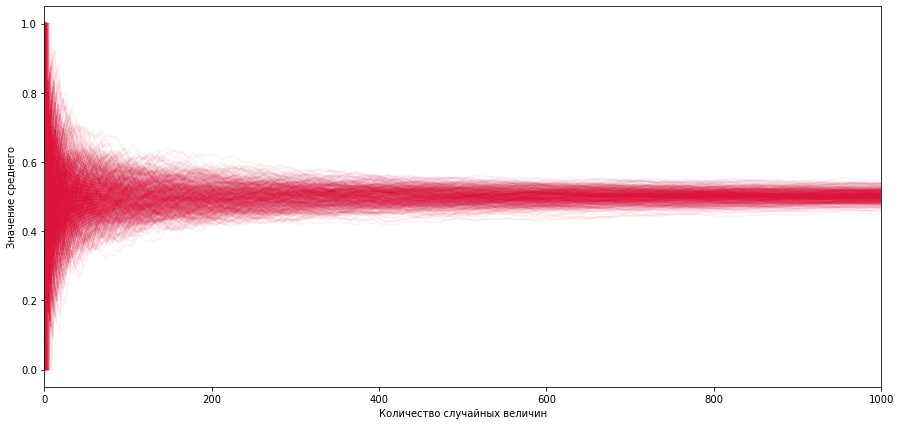

In [ ]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Поставим ее еще меньше

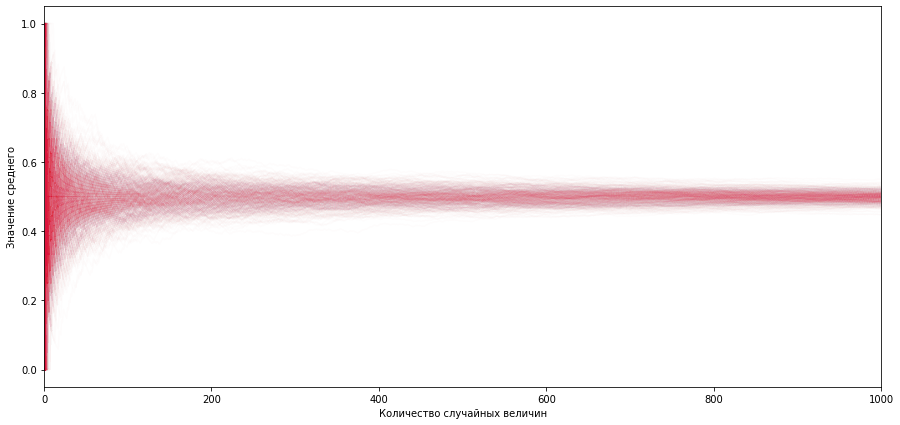

In [ ]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson', alpha=0.01)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

**Вывод:** При достаточность большом количестве случайных величин значение среднего не сильно
отклоняется от математического ожидания, причем чем больше случайных величин просуммированы, тем меньше отклонения. Данный эксперимент хорошо визуализирует закон больших чисел.


Таким образом, в данном случае выборочное среднее -- "хорошая оценка", т.к. с ростом выборки его значение приближается к истинному значению параметра.


Это  эксперимент намекает нам, что некоторые оценки могут быть "хорошими" в каком-лмбо смысле. О том, какие у оценок бывают "хорошие" свойства -- на следующих занятиях!

## Задание 3
Проведите подобный эксперимент для ядерной оценки плотности. 

Сгенерируйте 100 выборок по 1000 элементов из нормального распределения ($\mu$=0, $\sigma$=1). 

In [ ]:
size = 100
samples_count = 100
sample = sps.norm.rvs(size=(samples_count, size))
sample.shape

(100, 100)

Отрисуйте их ядерные оценки плотности на одном графике.  На этом же графике отрисуйте плотность искомого распределения

Увеличьте размер выборок до 1000 и повторите эксперимент.

А теперь наоборот - поставьте размер выборки 100, а кол-во - 1000 и повторите эксперимент.

# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>

## Титаник

Был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа.

Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

![kartinki-titanik-34.jpg](attachment:kartinki-titanik-34.jpg)

**Этот обучающий ноутбук на примерах показывает основную функциональность библиотек `pandas` и `seaborn`.**

Подробные обучающие ноутбуки можно посмотреть по ссылкам:
* <a href="https://miptstats.github.io/courses/python/08_pandas1.html" target="_blank">Библиотека pandas — типы данных Series и DataFrame, запись и чтение файлов, работа с датами.</a>
* <a href="https://miptstats.github.io/courses/python/10_pandas2.html" target="_blank">Библиотека pandas — объединение таблиц, группировки, таблицы сопряженности и сводные таблицы.</a>
* <a href="https://miptstats.github.io/courses/python/09_seaborn.html" target="_blank">Библиотека seaborn.</a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2', font_scale=1.3)

### 1. Чтение данных

<i><a href="https://miptstats.github.io/courses/python/08_pandas1.html#3.-Чтение-и-запись-данных" target="_blank">Подробнее про чтение и запись данных.</a></i>

Прочитаем данные с помощью библиотеки `pandas`. Библиотека pandas предназначена для статистической обработки данных, по функциональности близкий к SQL и R. Включает в себя функциональность работы с базами данных и таблицами Excel.

При чтении укажем, что первую колонку нужно использовать в качестве индекса (т.е. ключа) в таблице: `index_col=0`.

Мы видим таблицу со следующими колонками:
* `Pclass` — класс пассажира (`1` — высший, `2` — средний, `3` — низший);
* `Name` — имя;
* `Sex` — пол;
* `Age` — возраст;
* `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;
* `Parch` — количество родителей, детей (в том числе приемных) на борту титаника;
* `Ticket` — номер билета;
* `Fare` — плата за проезд;
* `Cabin` — каюта;
* `Embarked` — порт посадки (`C` — Шербур; `Q` — Квинстаун; `S` — Саутгемптон).

In [ ]:
data = pd.read_csv('train.csv', index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Можно вывести только строго указанное количество строк

In [ ]:
data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Соответствующая переменная имеет тип данных `DataFrame`.

In [ ]:
type(data)

pandas.core.frame.DataFrame

### 2. Способы извлечения данных

Данные из отдельной колонки

In [ ]:
data['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Если имя колонки "достаточно хорошее", то можно и так

In [ ]:
data.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Данные по столбцу имеют тип данных `Series`.

In [ ]:
type(data.Name)

pandas.core.series.Series

Можно вытащить сразу несколько колонок

In [ ]:
data[['Survived', 'Pclass', 'Name']]

,Survived,Pclass,Name
PassengerId,,,
1,0,3,"Braund, Mr. Owen Harris"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,3,"Heikkinen, Miss. Laina"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,0,3,"Allen, Mr. William Henry"
...,...,...,...
887,0,2,"Montvila, Rev. Juozas"
888,1,1,"Graham, Miss. Margaret Edith"
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie"""


Имена всех колонок

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Список всех индексов таблицы (т.е. ключей)

In [ ]:
data.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

Название колонки-индекса

In [ ]:
data.index.name

Тип данных в каждой из колонок таблицы

In [ ]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Строку таблицы, соответствующую *ключу 1*, можно получить через `loc`

In [ ]:
data.loc[1]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                              22
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

Обратите внимание, что *обычный численный индекс* этой строки равен 0. По нему также можно извлекать строку с мопощью `iloc`.

In [ ]:
data.iloc[0]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                              22
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

Если же попробовать запустить

то возникнет исключение `KeyError: 0`, поскольку ключа `0` в этой таблице нет.

Можно извлечь несколько строк

In [ ]:
data.iloc[0:3]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Можно извлечь конкретное значение

In [ ]:
data.iloc[0]['Name']

'Braund, Mr. Owen Harris'

Или так

In [ ]:
data.iloc[0, 2]

'Braund, Mr. Owen Harris'

### 3. Примеры анализа данных из таблицы

#### 3.1 Простые операции из `pandas`

Все описательные статистики по каждой колонке с вещественным типом данных

In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Идентификация пропусков в таблице

In [ ]:
data.isna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


Можно посчитать долю пропущенных значений в каждой колонке

In [ ]:
data.isna().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

Сортировка по столбцу

In [ ]:
data.sort_values(by='Age')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


#### 3.2 Графики с помощью `seaborn`

Посмотрим, как можно работать с библиотекой `seaborn`. Это популярная библиотека готовых шаблонов для статистической визуализации, написанная на бэкенде `matplotlib`. Она имеет высокоуровневый интерфейс и по умолчанию может строить более эстетичные графики.

Построим гистограмму по возрасту отдельно для мужчин и женщин.

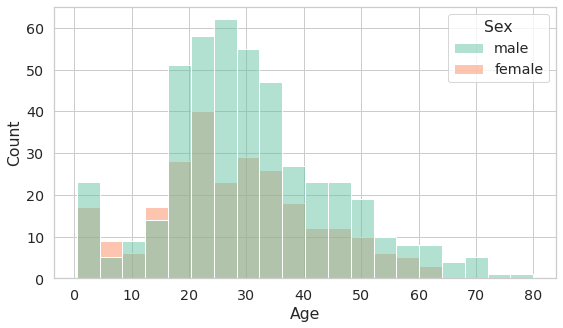

In [ ]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=data, x='Age', hue='Sex')

Построим боксплоты (ящики с усами) для стоимости билета в зависимости от класса.

<i><a href="https://miptstats.github.io/courses/python/09_seaborn.html#4.-Box-plot" target="_blank">Подробнее про боксплоты.</a></i>

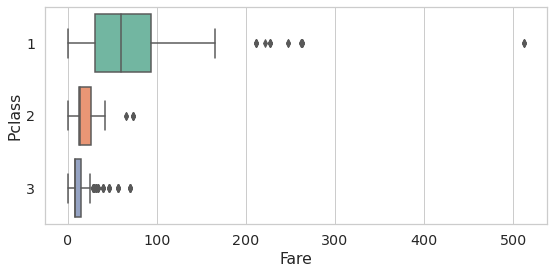

In [ ]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 4))
    sns.boxplot(data=data, x='Fare', y='Pclass', orient='h')

Ограничим значения по горизонтальной оси

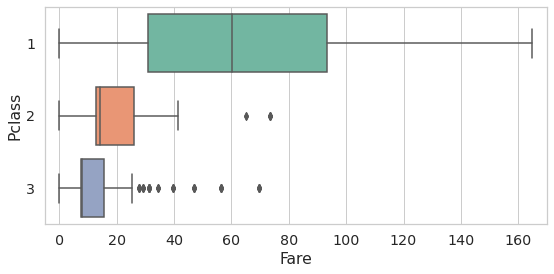

In [ ]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 4))
    sns.boxplot(data=data, x='Fare', y='Pclass', orient='h')
    plt.xlim((-5, 170))

#### 3.3 Более сложные операции из `pandas`

<i><a href="https://miptstats.github.io/courses/python/10_pandas2.html" target="_blank">Подробнее про группировку данных.</a></i>

Сгруппируем данные по классу и усредним по всем численным колонкам 

In [ ]:
data.groupby(by='Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


Похожим образом можно для каждого класса посчитать функции минимума и максимума

In [ ]:
data.groupby(by='Pclass').aggregate([min, max])

Survived                               Name  \
            min max                            min   
Pclass                                               
1             0   1  Allen, Miss. Elisabeth Walton   
2             0   1            Abelson, Mr. Samuel   
3             0   1            Abbing, Mr. Anthony   

                                        Sex         Age       SibSp     Parch  \
                                max     min   max   min   max   min max   min   
Pclass                                                                          
1          Young, Miss. Marie Grice  female  male  0.92  80.0     0   3     0   
2         del Carlo, Mr. Sebastiano  female  male  0.67  70.0     0   3     0   
3       van Melkebeke, Mr. Philemon  female  male  0.42  74.0     0   8     0   

            Ticket             Fare            
       max     min         max  min       max  
Pclass                                         
1        4  110152   WE/P 5735  0.0  512.3292  
2        3   11668   W/C 14208  0.0   73.5000  
3        6   12460  W./C. 6609  0.0   69.5500

---

<i><a href="https://miptstats.github.io/courses/python/10_pandas2.html#4.-Таблицы-сопряженности-(Crosstab)-и-сводные-таблицы-(Pivot-table)" target="_blank">Подробнее про агрегирующие функции.</a></i>

С помощью функции `crosstab` можно очень легко получить информацию о том, сколько человек определенного пола ехали в таком-то классе, а также сумму по строкам и столбцам.

In [ ]:
pd.crosstab(data['Sex'], data['Pclass'], margins=True)

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


А с помощью похожей функции `pivot_table` можно легко получить информацию о том, каков максимальный возраст среди пассажиров определенного пола для каждого класса.

In [ ]:
pd.pivot_table(
    data, 
    values='Age', 
    index='Sex',
    columns='Pclass', 
    aggfunc=np.max
)

Pclass,1,2,3
Sex,,,
female,63.0,57.0,63.0
male,80.0,70.0,74.0


## Лекция 3. Статистики и оценки. Свойства оценок. Асимптотические доверительные интервалы. Практика на примере равномерного распределения.
Примеры разных подходов к задаче:
- Пример 1

Есть N человек, на лекцию пришли M человек. Выберем n человек случайно(из всех)

Теория вероятностей: P(среди случайных n человек есть ровно m из тех, кто на лекции)

Математическая статистика: Неизвестно M. Выбрали случайно n человек, m из них присутствует на лекции. M = ?

- Пример 2

Теория вероятностей: $\xi$ ~ $Norm(1;4), E\xi = 1, P(\xi \in [0;1]) = ?$

Математическая статистика: $\xi$ ~ $Norm(\mu, \sigma ^2)$, где $\mu, \sigma$ - неизвестные. Сгенерировали $X = (X_1, X_2,..., X_n)$ - независимые реализации. __Вопрос__: $\mu, \sigma$ = ?

Основная задача статистики - по независимым реализациям экспериментальной выборки высказать суждение о природе этого эксперимента

### 1. Статистики и их оценки
__Выборка__ - набор независимых одинаково распределенных случайных величин $\textbf{X} = (X_1, X_2,..., X_n)$

__Реализация выборки__ - $\mathcal{\textbf{x}} = (\mathcal{x}_1, \mathcal{x}_2,..., \mathcal{x}_n)$, где $\mathcal{x}_i = X_i(\omega)$

__Статистика__ - функция от выборки вида $\widehat{\theta}(\textbf{X})$

Пусть есть семейство распределений $\mathcal{P} = \{P_{\theta}|\theta \in \Theta\}$, где $\theta$ - параметр семейства, $\Theta$ - мн-во параметров

Пример:

$\rho = \{Norm(\mu, \sigma ^2)|\mu \in \mathcal{R}, \sigma \in \mathcal{R}\}$. Здесь $\theta = (\mu, \sigma), \Theta = \mathcal{R} \times \mathcal{R}_+$

__Оценка__ - статистика $\widehat{\theta}(\textbf{X})$ наз-ся оценкой, если ее множество значений вложено в $\Theta$

Примеры статистик:

1) $\overline{g(x)} = \frac{1}{n}\sum\limits^n_{i = 1}g(x_i)$

$\overline{x} = \frac{1}{n}\sum\limits^n_{i = 1}x_i$ - выборочное среднее

$\overline{x^k} = \frac{1}{n}\sum\limits^n_{i = 1}x_i^k$ - выборочный момент k-го порядка

2) $S^2  = \overline{x^2} - \overline{x}^2$ - выборочная дисперсия

$S^2 = \frac{1}{n}\sum\limits^n_{i = 1}(x_i - \overline{x})^2$

3) Отсортируем выборку по возрастанию:

$X_{(1)},...,X_{(n)}$ - вариационный ряд

Пример

X = (0;1; -1)

$\overline{X} = 0, S^2 = \frac{2}{3}$

Упражнение

$E_{\theta}\overline{x} = E_{\theta}(\frac{1}{n}\sum\limits^n_{i = 1}x_i)\stackrel{\text{линейность}}{=======}\frac{1}{n}\sum\limits^n_{i = 1}E_{\theta}x_i\stackrel{def_{\text{выборки}}}{=======}\frac{1}{n}nE_{\theta}x_1= E_{\theta}x_1$

$D_{\theta}\overline{x} = D_{\theta}(\frac{1}{n}\sum\limits^n_{i = 1}x_i)\stackrel{x_i\text{-независ.}}{=======}\frac{1}{n^2}\sum\limits^n_{i = 1}D_{\theta}x_i\stackrel{def_{\text{выборки}}}{=======}\frac{1}{n^2}nD_{\theta}x_1= \frac{D_{\theta}x_1}{n}$

Свойства оценок

Обозначения: $P_{\theta}, E_{\theta}, D_{\theta}$ - в предположении истинности значения $\theta$

Св-ва $\widehat{\theta}_n(x_1,...,x_n)$:

1) __Несмещенность__, если $E\widehat{\theta}_n = \theta$ $\forall\theta \in \Theta$

Примеры: 
- $\widehat{\theta}_1 = \overline{x}$ - несмещенная
- $\widehat{\theta}_2 = x$ - несмещенная

2) __Состоятельность__, если 